In [1]:
# Jupyter notebook Python code voor Autoencode Neural Net Jeugddata Zuid Holland Zuid
# Auteur Kees van den Tempel, AI-labs BV, Tricht
# Versie 1.2
# 10-3-2023

import tensorflow as tf
import tensorflow_data_validation as tfdv
from tensorflow_metadata.proto.v0 import schema_pb2

print('TFDV Version: {}'.format(tfdv.__version__))
print('Tensorflow Version: {}'.format(tf.__version__))

TFDV Version: 1.12.0
Tensorflow Version: 2.11.0


In [2]:
# Jupyter notebook Python code voor Autoencode Neural Net Jeugddata Zuid Holland Zuid
# Auteur Kees van den Tempel, AI-labs BV, Tricht
# Versie 1.0
# 10-10-2022

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn
import datetime
from sklearn.preprocessing import OrdinalEncoder
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import pickle
import json

#%matplotlib inline

DevSet = 0.0
Testset = 0.1
Calc_Log = True
HyperparameterTuning = False
UseKFold = False
NormalizeData = False
RandomForest = False
Categorical_Limiet = 1200000000
target = 'GedeclareerdeKostenExclBtw'
CorrelatieKenmerk = 'GedeclareerdeTariefExclBtw'
DoNotDeleteColumns = False

# load all data
aeset = pd.read_csv('data/Declaraties_autoencoder.csv',sep=',' ,header=0, decimal=".")

print(aeset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615867 entries, 0 to 615866
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     615867 non-null  int64  
 1   DeclaratieId                   615867 non-null  int64  
 2   ContractId                     615867 non-null  int64  
 3   ContractStatusId               615867 non-null  int64  
 4   ClientId                       615867 non-null  int64  
 5   ContractStartdatum             615867 non-null  int64  
 6   ContractEinddatum              615867 non-null  int64  
 7   Hoeveelheid                    615867 non-null  int64  
 8   Levereenheid                   615867 non-null  object 
 9   Betaalfrequentie               615867 non-null  object 
 10  Betaalmethode                  615867 non-null  object 
 11  TypeContract                   615867 non-null  object 
 12  CommitmentId                  

In [3]:
aeset.drop(['Unnamed: 0'], axis=1, inplace=True)
aeset.rename(columns={'Hoeveelheid': 'Hoeveelheids'}, inplace=True)

pd.set_option('display.max_columns', None)
aeset.head(15)

,DeclaratieId,ContractId,ContractStatusId,ClientId,ContractStartdatum,ContractEinddatum,Hoeveelheids,Levereenheid,Betaalfrequentie,Betaalmethode,TypeContract,CommitmentId,DeclaratieStatusId,KalenderJaar,Periodenummer,BtwPercentage,GedeclareerdeEenhedenOfBudget,EenhedenDeler,GedeclareerdeTariefExclBtw,GedeclareerdeKostenExclBtw,DatumVanDeclaratie,Budgettype,RegioId,GemeenteId,ZorgsoortId,TeamId,LevereenheidId,BudgettypeId,nProductID,nAanbiederID,__ContractDuur,__MeanProductDecl,__StdDevProductDecl,__AantalProductDecl,__MeanAanbiederDecl,__StdDevAanbiederDecl,__AantalAanbiederDecl,__MeanProductHvlh,__StdDevProductHvlh,__MeanAanbiederHvlh,__StdDevAanbiederHvlh,__DeclaratiePeriode,__MeanProductDeclduur,__StdDevProductDeclduur,__MeanAanbiederDeclduur,__StdDevAanbiederDeclduur,__MeanClientDeclduur,__StdDevClientDeclduur,__EerdereDeclaraties,__Volgnummer,__EerdereDeclaratieduur,__KalenderMaand
0,871535,62396,5800,39988,20140100000000,20150300000000,1,Stuks(output),Jaarlijks,ZiN,Algemeen,1998836,8700,2015,1,0,1,1,639.59,639.59,20151100000000,GGZ,1,13,3,30,10,305.0,6954.0,2143.0,10200000000,696.402680,51.279011,1683,675.112552,382.755254,1007,1.027430,0.446905,1.000000,0.0000,424,122.027926,94.489270,61.526316,84.259439,241.500000,258.093975,639.59,0,0,1
1,854325,73140,5800,42294,20140100000000,20150800000000,1,Stuks(output),Jaarlijks,ZiN,Algemeen,2083433,8700,2015,1,0,1,1,2148.88,2148.88,20151100000000,GGZ,1,4,3,21,10,305.0,22738.0,1256.0,10700000000,857.183498,1886.293228,111285,2500.260000,1289.652796,5,1.007290,0.779092,1.000000,0.0000,546,39.725237,89.830317,230.000000,176.649370,546.000000,0.000000,2148.88,0,0,2
2,855497,74113,5800,31884,20140200000000,20150300000000,1,Stuks(output),Jaarlijks,ZiN,Algemeen,2084953,8700,2015,1,0,1,1,1123.37,1123.37,20151100000000,GGZ,1,12,3,29,10,305.0,22738.0,2203.0,10100000000,857.183498,1886.293228,111285,620.192616,856.099937,5891,1.007290,0.779092,1.000000,0.0000,393,39.725237,89.830317,10.393821,38.889029,393.000000,0.000000,1123.37,0,0,2
3,856639,73799,5800,42819,20140300000000,20150300000000,1,Stuks(output),Jaarlijks,ZiN,Algemeen,2084943,8700,2015,1,0,1,1,408.41,408.41,20151100000000,GGZ,1,17,3,33,10,305.0,6953.0,1064.0,10000000000,405.381298,47.299328,1109,678.105779,804.036330,5930,1.015483,0.355625,1.089353,0.9284,365,106.251578,109.753764,50.866273,100.400597,85.200000,158.627551,408.41,0,0,3
4,871537,62403,5800,39995,20140300000000,20150400000000,1,Stuks(output),Jaarlijks,ZiN,Algemeen,1998841,8700,2015,1,0,1,1,375.38,375.38,20151100000000,GGZ,1,13,3,30,10,305.0,6953.0,2143.0,10100000000,405.381298,47.299328,1109,675.112552,382.755254,1007,1.015483,0.355625,1.000000,0.0000,396,106.251578,109.753764,61.526316,84.259439,99.000000,198.000000,375.38,0,0,3
5,871536,62404,5800,39996,20140300000000,20150400000000,1,Stuks(output),Jaarlijks,ZiN,Algemeen,1998842,8700,2015,1,0,1,1,375.38,375.38,20151100000000,GGZ,1,13,3,30,10,305.0,6953.0,2143.0,10100000000,405.381298,47.299328,1109,675.112552,382.755254,1007,1.015483,0.355625,1.000000,0.0000,396,106.251578,109.753764,61.526316,84.259439,182.666667,199.773205,375.38,0,0,3
6,863820,62428,5800,40016,20140400000000,20150200000000,1,Stuks(output),Jaarlijks,ZiN,Algemeen,1998864,8700,2015,1,0,1,1,375.38,375.38,20151100000000,GGZ,1,11,3,28,10,305.0,6953.0,2143.0,9800000000,405.381298,47.299328,1109,675.112552,382.755254,1007,1.015483,0.355625,1.000000,0.0000,306,106.251578,109.753764,61.526316,84.259439,306.000000,0.000000,375.38,0,0,4
7,855501,74120,5900,41963,20140400000000,20150200000000,1,Stuks(output),Jaarlijks,ZiN,Algemeen,2084959,8700,2015,1,0,1,1,1123.37,1123.37,20151100000000,GGZ,1,14,3,31,10,305.0,22738.0,2203.0,9800000000,857.183498,1886.293228,111285,620.192616,856.099937,5891,1.007290,0.779092,1.000000,0.0000,306,39.725237,89.830317,10.393821,38.889029,50.000000,112.103524,1123.37,0,0,4
8,871538,62408,5800,39999,20140500000000,20150200000000,1,Stuks(output),Jaarlijks,ZiN,Algemeen,1998846,8700,2015,1,0,1,1,375.38,375.38,20151100000000,GGZ,1,1

In [4]:
# from sklearn.preprocessing import Imputer
# missende waarden worden gevuld
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(aeset)
# aeset = imputer.transform(aeset)

# Detecteer in welke kolom er NaN waarden zitten en maak er 0 van
nan_cols = [i for i in aeset.columns if aeset[i].isnull().any()]
print("Columns with NaN: " + str(nan_cols))
for var in nan_cols: aeset[var].fillna(0, inplace=True)
    
# Detecteer in welke kolom er INF waarden zitten en maak er 0 van
inf_cols = [i for i in aeset.columns if aeset[i].isin([np.inf, -np.inf]).all()]
print("Columns with Inf: " + str(inf_cols))
for var in inf_cols: aeset[var].replace([np.inf, -np.inf], np.nan, inplace=True)
aeset.dropna(subset=[inf_cols], inplace=True)

categorical = [var for var in aeset.columns if aeset[var].dtype=='O']
for var in categorical: aeset[var].str.strip()
print("leading and trailing spaces deleted")

Columns with NaN: []
Columns with Inf: []
leading and trailing spaces deleted


In [5]:
# Verwijder de features die maar voor een bepaald percentage gevuld zijn
perc = 35.0 # Like N %
min_count =  int(((100-perc)/100)*aeset.shape[0] + 1)
aeset = aeset.dropna( axis=1, 
                thresh=min_count)


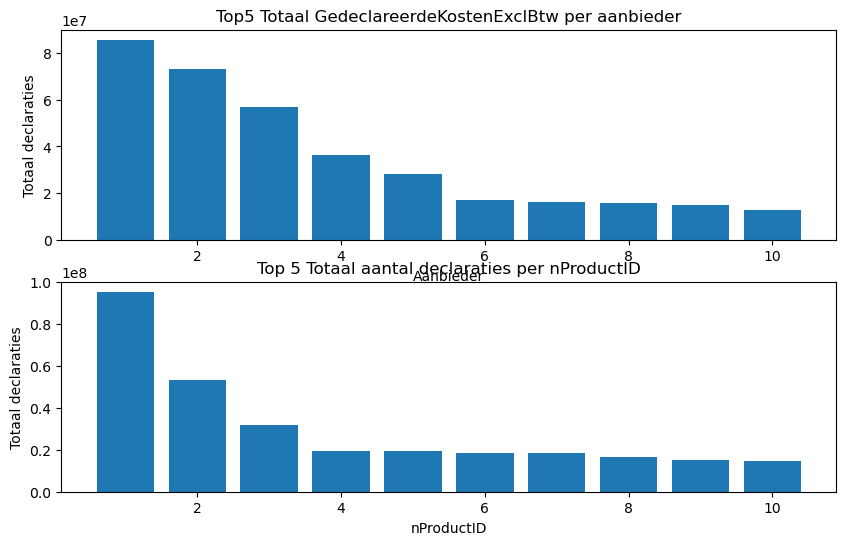

In [6]:
import matplotlib.pyplot as plt

numbars = 10

fig, axs = plt.subplots(2,1,figsize=(10, 6))

# de voorbeeld datasets vullen
df = aeset.groupby('nAanbiederID')['GedeclareerdeKostenExclBtw'].sum().sort_values(ascending=False).head(numbars)
x = np.array(range(1,numbars+1,1))
y = df.values

# Een grafiek maken
axs[0].bar(x, y)
axs[0].set_title('Top5 Totaal GedeclareerdeKostenExclBtw per aanbieder')
axs[0].set(xlabel='Aanbieder', ylabel='Totaal declaraties')

# de voorbeeld datasets vullen
df = aeset.groupby('nProductID')['GedeclareerdeKostenExclBtw'].sum().sort_values(ascending=False).head(numbars)
x = np.array(range(1,numbars+1,1))
y = df.values

# Een grafiek maken
axs[1].bar(x, y)
axs[1].set_title('Top 5 Totaal aantal declaraties per nProductID')
axs[1].set(xlabel='nProductID', ylabel='Totaal declaraties')

plt.show() 


In [7]:
# Feature selection deel 1: allereerst alle niet relevante kolommen verwijderen, dus:
# constante waarden
# quasi constante waarden
# identieke kolommen

# Hieronder worden allereerst de kolommen met constante waarden verwijderd:
constant_features = [
    feat for feat in aeset.columns if aeset[feat].nunique() == 1
]

print("Er zijn "+ str(len(constant_features)) + " kolommen met een constante waarde die worden verwijderd\n")

if len(constant_features)>0:
    print(constant_features)
    aeset.drop(constant_features, axis=1, inplace=True)


Er zijn 3 kolommen met een constante waarde die worden verwijderd

['TypeContract', 'RegioId', 'ZorgsoortId']


In [8]:
# Feature selection deel 1: allereerst alle niet relevante kolommen verwijderen:
# In deze routine worden de kolommen verwijderd die een pre-dominante waarde bevatten

# create an empty list
quasi_constant_feat = []

# Itereer over alle kolommen en bepaal de meest dominante waarde
# Als de records 99,85% van deze dominante waarde bevat, wordt de kolom verwijderd
for feature in aeset.columns:

    try :
        # Vind de meest pre-dominante waarde
        # print(feature)
        # print(aeset[feature].value_counts())
        NumberOfRecords = np.float64(len(aeset))

        predominant = (aeset[feature].value_counts() / NumberOfRecords).sort_values(ascending=False).values[0]

        # evaluate the predominant feature: do more than 99% of the observations
        # show 1 value?
        if predominant > 0.99:

            # Als de waarde predominant is, wordt de kolomnaam aan de quasi_constant_feat toegevoegd
            quasi_constant_feat.append(feature)

    except IndexError:
        print ("Error:  op kolom " + feature)
        aeset.drop(feature, axis=1, inplace=True)
        
print(quasi_constant_feat)
print("Er zijn "+ str(len(quasi_constant_feat)) + " kolommen met een quasi constante waarde die worden verwijderd\n")

if len(quasi_constant_feat)>0:
    aeset.drop(quasi_constant_feat, axis=1, inplace=True)


['Betaalmethode', 'DeclaratieStatusId', 'BtwPercentage']
Er zijn 3 kolommen met een quasi constante waarde die worden verwijderd



In [9]:
# Controleer of er kolommen met dubbele waarden in de dataset zitten
# We zoeken dan naar de kolom-paren die identiek zijn:
duplicated_feat_pairs = {}

# onderstaande variabele bevat de kolommen die gedupliceerd zijn:
_duplicated_feat = []

# itereer over alle kolommen:
for i in range(0, len(aeset.columns)):
    
    # Dit is handig om te weten waar de loop is:
    # if i % 5 == 0:  
    #    print(i)
    
    # kies één kenmerk:
    feat_1 = aeset.columns[i]
    
    # controleer of dit kenmerk ook al in een andere kolom voorkomt,
    # dan moet het bewaard worden in _duplicated_feat list.
    # Als het al voorkomt in de lijst skippen we het
    if feat_1 not in _duplicated_feat:
    
        # create an empty list as an entry for this feature in the dictionary:
        duplicated_feat_pairs[feat_1] = []

        # now, iterate over the remaining features of the dataset:
        for feat_2 in aeset.columns[i + 1:]:

            # check if this second feature is identical to the first one
            if aeset[feat_1].equals(aeset[feat_2]):

                # if it is identical, append it to the list in the dictionary
                duplicated_feat_pairs[feat_1].append(feat_2)
                
                # and append it to our monitor list for duplicated variables
                _duplicated_feat.append(feat_2)

                
print(_duplicated_feat)
print("Er zijn "+ str(len(_duplicated_feat)) + " kolommen met een dubbele waarden die worden verwijderd\n")

if len(_duplicated_feat)>0:
    aeset.drop(_duplicated_feat, axis=1, inplace=True)


[]
Er zijn 0 kolommen met een dubbele waarden die worden verwijderd



In [10]:
# Dit is voorbeeld code waarbij een aantal numeriek waarden worden vervangen door een string om zo een dataset te maken
# die vervuild is met text-strings, om ze daarna op te kunnen sporen en de feature weer numeriek te maken
# Door de vervuiling is de kolom een object geworden. Met np.isreal kan bepaald worden welke rijen een string waarde hebben
# Deze worden vervolgens weggegooid. Ook wordt de index gereset.

if 1==2:
    aeset.loc[1, 'nProductID']="test"
    aeset.loc[3, 'nProductID']="test"
    aeset.loc[5, 'nProductID']="test"
    print(aeset.head(5))
    print(aeset['nProductID'].map(np.isreal))

    # print alleen de indexen van de rijen die een string waarde hebben
    print(aeset[aeset['nProductID'].map(np.isreal)==False].index)
    # Hier het bewijs dat de kolom niet alleen maar integers heeft.
    aeset.info()

    # Gooi vervolgens alle rijen weg die een string waarde hebben
    aeset.drop(aeset[aeset['nProductID'].map(np.isreal)==False].index, axis=0, inplace=True)
    # Forceer de kolommen terug naar integer-type
    aeset['nProductID'] = np.int64(aeset['nProductID'])
    # reset de index
    aeset.reset_index(drop=True, inplace=True)
    # Bewijs dat de kolom weer integer is
    aeset.info()

In [11]:
if 1==2:
    for var in aeset.columns:
        print(str(var) + " " + str(aeset[var].nunique()))

In [12]:
aeset['Betaalfrequentie'] = aeset['Betaalfrequentie'].map({'Jaarlijks':365, 'Per 4 weken': 28, 'Eenmalig':1, 'Maandelijks':30})


In [13]:
print(aeset['GemeenteId'].nunique())


19


In [14]:
# Dit is een probeer-script om een embedding layer te testen.
# Er is alleen maar een embedding layer, en deze vertaald de individuele categorieën naar vectoren
# Deze vectoren hebben een willekeurige waarde --> pas als je ze in een trainbaar neuraal netwerk zet,
# wordt de embedding layer mee-getraind

# import necessary libraries
from keras.layers import Input, Embedding, Flatten
from keras.models import Model
import tensorflow as tf
gemeenteID = aeset['GemeenteId']

# One-hot encode the GemeenteID feature
# gemeenteID_one_hot = tf.keras.utils.to_embegorical(aeset['GemeenteId'])
# print(gemeenteID_one_hot[:2,])

# define input layer
input_layer = Input(shape=(1,))

# define embedding layer with 19 units (one for each category) and input_dim set to the number of categories
embedding_layer = Embedding(input_dim=19, output_dim=3, input_length=1)(input_layer)

# flatten the embedding layer
flatten_layer = Flatten()(embedding_layer)

# create a model with the input layer, embedding layer, and flatten layer
model = Model(input_layer, flatten_layer)
print(model.summary())

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

new_embegory = [1, 2, 4, 6]
embedding = model.predict(new_embegory)

# print the embedding
print("gemeenteID:", new_embegory, "embedding:", embedding)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 embedding (Embedding)       (None, 1, 3)              57        
                                                                 
 flatten (Flatten)           (None, 3)                 0         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 115ms/step
gemeenteID: [1, 2, 4, 6] embedding: [[ 0.04619363  0.04620166 -0.00630647]
 [ 0.03106738 -0.01458699 -0.01005521]
 [-0.03263601 -0.03934195 -0.00546642]
 [ 0.03452814 -0.02988687 -0.04152473]]


In [15]:
# Maak een lijst van variabele typen die overgebleven zijn
# Ook wordt een lijst aangelegd van Nominale (geen intinsieke betekenis) en 
# ordinale numerieke waarden (wel intrinsieke waarde)

# Nominal_numeriek : One-hot/dummy, binary encoding of entity embedding
# Ordinal_numeriek : Normaliseren naar een waarde tussen o en 1
# Nominal_object   : one-hot/dummy of binary encoding of entity embedding
# Ordinal_object   : Label-Encoding

categorical_str = [var for var in aeset.columns if aeset[var].dtype=='O']
print(str(len(categorical_str)) + " categorical_str (object):     " + str(categorical_str) + "\n")

datums = [var for var in aeset.columns if aeset[var].dtype!='O' and ('datum' in var or 'Datum' in var or 'Jaar' in var or 'Maand' in var) ]
print(str(len(datums)) + " datums (datetime):        " + str(datums) + "\n")

NominalNumeric = [var for var in aeset.columns if aeset[var].dtype!='O' and ('Id' in var[-2:] or 'ID' in var[-2:] or 'id' in var[-2:]) ]
print(str(len(NominalNumeric)) + " NominalNumeric (Numeric):        " + str(NominalNumeric) + "\n")

categorical_int = [var for var in aeset.columns if aeset[var].dtype!='O' and aeset[var].nunique()<50 and var not in datums and var not in NominalNumeric and var not in categorical_str]
print(str(len(categorical_int)) + " categorical_int (int):     " + str(categorical_int) + "\n")
# categorical_intfloat = [var for var in aeset.columns if (aeset[var]%1 != 0).all()==True and aeset[var].nunique()<510 and var not in datums and var not in categorical_str]
# print(str(len(categorical_intfloat)) + " categorical_intfloat (float):     " + str(categorical_intfloat) + "\n")

continuous = [var for var in aeset.columns if aeset[var].dtype!='O' and var not in NominalNumeric and var not in categorical_int and var not in datums and var not in categorical_str]
print(str(len(continuous)) + " continuous (float/int):   " + str(continuous) + "\n")

# De indeling hier bepaalt welke actie er uitgevoerd nmoet worden om de varaibelen geschikt te maken het neurale netwerk
Binary = []
OneHot = ['KalenderJaar','EenhedenDeler','Betaalfrequentie', 'nProductID', 'nAanbiederID', 'ContractId', 'BudgettypeId', 'ContractStatusId', 'GemeenteId', 
          'TeamId', 'LevereenheidId']
SinEncoding = ['Periodenummer', '__KalenderMaand']
LabelEncode = []
Scaler = ['Hoeveelheids', '__MeanProductHvlh', '__StdDevProductHvlh', 
          '__MeanAanbiederHvlh', '__StdDevAanbiederHvlh', 
          '__MeanProductDeclduur', '__StdDevProductDeclduur', '__MeanAanbiederDeclduur', 
          '__StdDevAanbiederDeclduur', '__MeanClientDeclduur', '__StdDevClientDeclduur', 
          '__DeclaratiePeriode', '__AantalProductDecl', '__AantalAanbiederDecl', 
          '__StdDevProductDecl', '__MeanProductDecl', '__MeanAanbiederDecl', 
          '__StdDevAanbiederDecl', 'GedeclareerdeTariefExclBtw', '__EerdereDeclaraties', 
          '__EerdereDeclaratieduur', '__ContractDuur', 'GedeclareerdeKostenExclBtw', '__Volgnummer']
Delete = ['GedeclareerdeEenhedenOfBudget',  
          'Levereenheid', "Budgettype", 'CommitmentId', 'ContractStartdatum', 
          'ContractEinddatum', 'ClientId', 'DatumVanDeclaratie']

VARS = Delete + Scaler + LabelEncode + SinEncoding + OneHot + Binary
print("Niet benoemd: " + str([var for var in aeset.columns if var not in VARS]))

# Verwijder alle spaties voor en achter de strings
for col in categorical_str:
    aeset[col].str.strip()


2 categorical_str (object):     ['Levereenheid', 'Budgettype']

5 datums (datetime):        ['ContractStartdatum', 'ContractEinddatum', 'KalenderJaar', 'DatumVanDeclaratie', '__KalenderMaand']

11 NominalNumeric (Numeric):        ['DeclaratieId', 'ContractId', 'ContractStatusId', 'ClientId', 'CommitmentId', 'GemeenteId', 'TeamId', 'LevereenheidId', 'BudgettypeId', 'nProductID', 'nAanbiederID']

3 categorical_int (int):     ['Betaalfrequentie', 'Periodenummer', 'EenhedenDeler']

25 continuous (float/int):   ['Hoeveelheids', 'GedeclareerdeEenhedenOfBudget', 'GedeclareerdeTariefExclBtw', 'GedeclareerdeKostenExclBtw', '__ContractDuur', '__MeanProductDecl', '__StdDevProductDecl', '__AantalProductDecl', '__MeanAanbiederDecl', '__StdDevAanbiederDecl', '__AantalAanbiederDecl', '__MeanProductHvlh', '__StdDevProductHvlh', '__MeanAanbiederHvlh', '__StdDevAanbiederHvlh', '__DeclaratiePeriode', '__MeanProductDeclduur', '__StdDevProductDeclduur', '__MeanAanbiederDeclduur', '__StdDevAanbiederDeclduur

In [16]:
# datetime64(ns) is eigenlijk een float die het aantal nanoseconden specificeerd. Dit zorgt er voor dat datetime
# waarden maar van het jaar 1700 tot 2300 (ongeveer) kunnen lopen. Datums hoger of lager kunnen niet gespecificeerd
# worden, en zorgen dat de kolom als object wordt weergegeven. Dat moet opgelost worden

# https://stackoverflow.com/questions/32888124/pandas-out-of-bounds-nanosecond-timestamp-after-offset-rollforward-plus-adding-a
# https://datascience.stackexchange.com/questions/60955/how-to-check-all-values-in-particular-column-has-same-data-type-or-not

def ZoekenVerwijderfouteDatumWaarden(df, kolom):
    # Converteer de waardes in de kolom naar datetime, en bekijk voor welke rijen dit niet lukt:
    not_datetime = pd.to_datetime(df[kolom], errors='coerce').isna()

    print("Aantal rijen met juiste dtype (false) en met de verkeerde dtype (True)")
    print(not_datetime.groupby(not_datetime).count())

    print("\nDeze rijen hebben de verkeerde dtype en worden verwijderd")
    print(df[not_datetime==True][kolom])
    df.drop(df[not_datetime==True].index, axis=0, inplace=True)

    # De kolom van de dataframe worden gedwongen op datetime64 gezet
    return df.astype({kolom: np.datetime64})
    
#aeset = ZoekenVerwijderfouteDatumWaarden(aeset, "MutatieDT")
#aeset = ZoekenVerwijderfouteDatumWaarden(aeset, "TransDT")

In [17]:
# Verwijder categorische variabelen waarvan de unieke aantal waarden > Categorical_Limiet is
for col in OneHot:
    aeset[col] = aeset[col].fillna(0).astype(int)
    print("Aantal unieke waarden in " + col + ": " + str(aeset[col].nunique()) + ": " + str(aeset[col].unique()))
    if aeset[col].nunique()>=Categorical_Limiet:
        aeset.drop(col, axis=1, inplace=True)
        print("---> Kolom "+ col + " verwijderd")
        categorical.remove(col)
        OneHot.remove(col)



Aantal unieke waarden in KalenderJaar: 7: [2015 2016 2017 2018 2019 2020 2021]
Aantal unieke waarden in EenhedenDeler: 2: [ 1 60]
Aantal unieke waarden in Betaalfrequentie: 4: [365  28   1  30]
Aantal unieke waarden in nProductID: 148: [ 6954 22738  6953  6955 22749 23585 23633 22727 23599  6749 23591  6750
 23576 23650 23594 23267 23578 23272 23579 23255 23256 23593 23274 23257
 23268 23592 23260 23273 23618 23254 23629 23637 23265 23600 23619 23636
 23631 23574  6757 23264 23263 23647 23643 23601 23278 23266 23584 23262
 23588 23642 23639 23583 23571 23276 19588 22331 22306 23575  6956 22310
  6755 23573 23261 23641 22826 21877 22831 22737 22830 22828 23617 22750
  6663 22827 23271 23572  6660 23259 23277 23632 23640 22829 23258 23590
 22123  6737 14553 22813 23737 22814 23334 22824 22703 23269 23344 22809
 23743 23581 23582 22817  6738  6802 22665 22736 22811 23338 22816 23343
 23153 23339 22821 22823 23351 22822 23635 22748 23646 23118 23596 23620
 23345 22815 23348 22812 22746  67

In [18]:
# Verwijder de features die geen toegevoegde waarde hebben voor ML

aeset.drop(Delete, axis=1, inplace=True)
print("De volgende kolommen zijn verwijderd : " + str(Delete))

De volgende kolommen zijn verwijderd : ['GedeclareerdeEenhedenOfBudget', 'Levereenheid', 'Budgettype', 'CommitmentId', 'ContractStartdatum', 'ContractEinddatum', 'ClientId', 'DatumVanDeclaratie']


In [19]:
# Splits de aeset-dataset in een training- en een testset voor het machine learning model
# Eerst moet er een training en test set gemaakt worden om daarna allerlei bewerkingen en filters toe te passen
# om zo data leakage te voorkomen

aeset.reset_index()
features = aeset.copy()
labels = aeset[target]
feature_list = list(features.columns)

# Saving feature names for later use
print ("Features: " + str(features.shape))
print ("Labels: " + str(labels.shape) + "\n")

# Split the data into training and testing sets
x_train, x_test = train_test_split(features, test_size = Testset, random_state = 43, shuffle=True)

print(str(type(x_train)) + ': x_train Shape:', x_train.shape)
print(str(type(x_test)) + ': x_test Shape:', x_test.shape)


Features: (615867, 38)
Labels: (615867,)

<class 'pandas.core.frame.DataFrame'>: x_train Shape: (554280, 38)
<class 'pandas.core.frame.DataFrame'>: x_test Shape: (61587, 38)


In [20]:
train_stats = tfdv.generate_statistics_from_dataframe(x_train)
test_stats = tfdv.generate_statistics_from_dataframe(x_test)

# Infer schema from the computed statistics.
schema = tfdv.infer_schema(statistics=train_stats)

# Display the inferred schema
tfdv.display_schema(schema)

# Compare training with evaluation
tfdv.visualize_statistics(
    lhs_statistics=test_stats, 
    rhs_statistics=train_stats, 
    lhs_name='TEST_DATASET', 
    rhs_name='TRAIN_DATASET'
)

,Type,Presence,Valency,Domain
Feature name,,,,
'DeclaratieId',INT,required,,-
'ContractId',INT,required,,-
'ContractStatusId',INT,required,,-
'Hoeveelheids',INT,required,,-
'Betaalfrequentie',INT,required,,-
'KalenderJaar',INT,required,,-
'Periodenummer',INT,required,,-
'EenhedenDeler',INT,required,,-
'GedeclareerdeTariefExclBtw',FLOAT,required,,-


In [21]:
x_train.head(10)

,DeclaratieId,ContractId,ContractStatusId,Hoeveelheids,Betaalfrequentie,KalenderJaar,Periodenummer,EenhedenDeler,GedeclareerdeTariefExclBtw,GedeclareerdeKostenExclBtw,GemeenteId,TeamId,LevereenheidId,BudgettypeId,nProductID,nAanbiederID,__ContractDuur,__MeanProductDecl,__StdDevProductDecl,__AantalProductDecl,__MeanAanbiederDecl,__StdDevAanbiederDecl,__AantalAanbiederDecl,__MeanProductHvlh,__StdDevProductHvlh,__MeanAanbiederHvlh,__StdDevAanbiederHvlh,__DeclaratiePeriode,__MeanProductDeclduur,__StdDevProductDeclduur,__MeanAanbiederDeclduur,__StdDevAanbiederDeclduur,__MeanClientDeclduur,__StdDevClientDeclduur,__EerdereDeclaraties,__Volgnummer,__EerdereDeclaratieduur,__KalenderMaand
305254,2792293,246836,5800,1,365,2018,5,60,103.80,25.95,4,21,10,305,22738,1240,500000000,857.183498,1886.293228,111285,931.723336,2279.886862,16684,712.017296,3529.574998,302.461527,1572.145101,0,39.725237,89.830317,52.216195,113.091923,10.764706,44.384019,27491.44,12,334,5
190386,2350117,145772,5800,3,28,2017,3,1,57.09,285.45,4,23,40,303,23267,1209,9900000000,474.671844,497.850841,6237,598.977243,1119.523617,26979,3.366057,2.168807,3.318860,1.718897,28,22.710277,13.375417,23.714111,12.638143,22.680851,13.346117,63097.72,125,793,2
532373,3587963,345516,5800,1,365,2020,3,60,85.20,340.80,8,26,10,303,23599,1215,10100000000,532.884996,1093.408518,26505,477.664110,496.785092,8459,1018.257267,3403.024986,998.506212,3247.206119,0,11.970307,14.995250,10.929070,18.930032,8.812500,13.889620,13159.83,26,790,3
39576,1610490,181653,5800,1,1,2015,5,60,241.36,10.26,15,20,10,306,6755,2142,1100000000,133.816467,265.249968,2035,787.616492,1387.764971,108943,138.467322,1498.185474,302.356754,2538.562690,0,0.613759,4.282916,1.362970,6.576860,2.935743,9.416221,26752.45,41,120,5
434966,3197825,294021,5800,1,365,2019,6,60,112.80,282.00,2,20,10,303,23592,1209,10600000000,489.176784,474.427093,6387,598.977243,1119.523617,26979,287.987944,1739.495753,436.500569,2478.378148,30,20.297949,14.394807,23.714111,12.638143,22.043956,13.660090,15251.06,35,638,6
191357,2122783,241029,5800,1,365,2017,2,1,1022.32,1022.32,4,21,10,305,22738,1246,800000000,857.183498,1886.293228,111285,507.102068,903.738126,7453,1.007290,0.779092,1.000000,0.000000,242,39.725237,89.830317,33.576412,97.700349,304.000000,87.681241,3550.42,1,366,2
168372,1692898,178840,5800,1,1,2016,11,60,173.82,1129.83,6,24,10,306,6749,1271,9900000000,325.537732,552.341553,46164,1007.924744,1998.092013,56703,207.864437,2100.317589,35.383453,903.274676,0,0.284551,2.959709,0.285029,5.855212,5.368687,22.132513,59101.57,95,670,11
270416,2681394,267011,5800,1,30,2018,2,1,383.09,383.09,3,27,10,309,23594,2164,500000000,431.734828,538.027658,12704,581.500330,588.384439,7913,1.012984,0.332259,1.013017,0.332678,0,15.861855,46.597826,0.000000,0.000000,18.908297,15.383272,62044.70,113,1158,2
96781,1640877,179749,5800,1,1,2015,12,1,134.00,4154.00,4,21,10,306,23576,2142,1100000000,3766.045280,1114.453088,3540,787.616492,1387.764971,108943,1.000000,0.000000,1.020439,0.155224,0,6.041243,12.399992,1.362970,6.576860,2.741176,8.726130,54445.42,37,334,12
92381,1534052,177917,5800,1,1,2015,11,60,173.82,10.72,4,21,10,306,6749,1271,1100000000,325.537732,552.341553,46164,1007.924744,1998.092013,56703,207.864437,2100.317589,35.383453,903.274676,0,0.284551,2.959709,0.285029,5.855212,3.170616,9.318660,16195.96,34,304,11


In [22]:
def DeleteNanInf(df):
    # Detecteer in welke kolom er NaN waarden zitten en maak er 0 van
    nan_cols = [i for i in df.columns if df[i].isnull().any()]
    print("Columns with NaN: " + str(nan_cols))
    for var in nan_cols: print("Aantal NaN in " + var + ": " + str(df[var].isna().sum()))
    for var in nan_cols: df[var].fillna(0, inplace=True)

    # Detecteer in welke kolom er INF waarden zitten en maak er 0 van
    inf_cols = [i for i in df.columns if df[i].isin([np.inf, -np.inf]).all()]
    print("Columns with Inf: " + str(inf_cols))
    for var in inf_cols: df[var].replace([np.inf, -np.inf], np.nan, inplace=True)
    for var in inf_cols: print("Aantal Inf in " + var + ": " + str(df[var].isna().sum()))
    df.dropna(subset=[inf_cols], inplace=True)

DeleteNanInf(x_train)
DeleteNanInf(x_test)

Columns with NaN: []
Columns with Inf: []
Columns with NaN: []
Columns with Inf: []


In [23]:
if len(LabelEncode)>0:
    print(str(LabelEncode) + " wil be Label-encoded")
    oenc = OrdinalEncoder()
    oenc.fit(x_train[LabelEncode])
    x_train[LabelEncode] = oenc.transform(x_train[LabelEncode])
    x_test[LabelEncode] = oenc.transform(x_test[LabelEncode])
    print(str(LabelEncode) + " is Label-encoded!")

print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554280 entries, 305254 to 276292
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   DeclaratieId                554280 non-null  int64  
 1   ContractId                  554280 non-null  int32  
 2   ContractStatusId            554280 non-null  int32  
 3   Hoeveelheids                554280 non-null  int64  
 4   Betaalfrequentie            554280 non-null  int32  
 5   KalenderJaar                554280 non-null  int32  
 6   Periodenummer               554280 non-null  int64  
 7   EenhedenDeler               554280 non-null  int32  
 8   GedeclareerdeTariefExclBtw  554280 non-null  float64
 9   GedeclareerdeKostenExclBtw  554280 non-null  float64
 10  GemeenteId                  554280 non-null  int32  
 11  TeamId                      554280 non-null  int32  
 12  LevereenheidId              554280 non-null  int32  
 13  Budgettyp

In [24]:
# Labels / y_train are the values we want to predict
y_train = x_train[target].copy()
y_test = x_test[target].copy()

x_train.drop(columns=[target], inplace=True)
x_test.drop(columns=[target], inplace=True)

print ("Label = " + str(target))
print ("X-matrix (de kenmerken)" + str(x_train.shape))
print ("Y-vector (de uitkomsten)" + str(y_train.shape))

Label = GedeclareerdeKostenExclBtw
X-matrix (de kenmerken)(554280, 37)
Y-vector (de uitkomsten)(554280,)


In [25]:
# Hier vindt een meer geavanceerde encoding plaats: kolommen zoals AanbiederId', 'ProductId', 'SoortAanvraag worden
# vertaald naar de gemiddelde waarden van de som van de declaraties voor die specifieke kolom
# Dit heet target-guided-encoding

# Er vindt een kopieer waarschuwing plaats. De resultaten zijn wel goed, maar toch:
# lees hier verder:  https://www.dataquest.io/blog/settingwithcopywarning/

def find_embegory_mappings(df, variable, target):
    return df.groupby([variable])[target].mean().to_dict()

def integer_encode(train, test, variable, ordinal_mapping):
    train[variable] = train[variable].map(ordinal_mapping)
    test[variable] = test[variable].map(ordinal_mapping)

if 1==2:
    for variable in ['AanbiederId', 'ProductId', 'SoortAanvraag']:
        mappings = find_embegory_mappings(x_train, variable, 'SomGedeclKosten')
        integer_encode(x_train, x_test, variable, mappings)

    print(x_train[['AanbiederId', 'ProductId', 'SoortAanvraag']].head())
    print(x_train.info())

In [26]:
# Pas rare-encoding toe voor de categorische en categorical_int kolommen
# Als een waarde minder dan 1% voorkomt, wordt deze omgezet naar 9999 (numeriek) of naar de string "rare"
# Dit zorgt er voor dat we een stuk minder categoriën krijgen en ons ML-model mogelijk beter werkt

def find_non_rare_labels(df, variable, tolerance):
    temp = df.groupby([variable])[variable].count() / len(df)
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    rare = [x for x in temp.loc[temp<=tolerance].index.values]
    print("None rare : " + str(non_rare))
    print("Rare : " + str(rare))
    return non_rare


def rare_encoding(X_train, X_test, variable, tolerance):
    X_train = X_train.copy()
    X_test = X_test.copy()

    # find the most frequent category
    frequent_emb = find_non_rare_labels(X_train, variable, tolerance)

    # re-group rare labels
    if str(x_train[col].dtypes)=='int64' or str(x_train[col].dtypes)=='float64' or str(x_train[col].dtypes)=='int32':
        X_train[variable] = np.where(X_train[variable].isin(frequent_emb), X_train[variable], 9999)
        X_test[variable] = np.where(X_test[variable].isin(frequent_emb), X_test[variable], 9999)
    else:
        X_train[variable] = np.where(X_train[variable].isin(frequent_emb), X_train[variable], 'Rare')
        X_test[variable] = np.where(X_test[variable].isin(frequent_emb), X_test[variable], 'Rare')

    frequent_emb = find_non_rare_labels(X_train, variable, tolerance)
    return X_train, X_test


for col in OneHot + Binary + LabelEncode:
    print("\n" + col + ": " + str(x_train[col].dtypes))
    x_train, x_test = rare_encoding(x_train, x_test, col, 0.005)


KalenderJaar: int32
None rare : [2015, 2016, 2017, 2018, 2019, 2020]
Rare : [2021]
None rare : [2015, 2016, 2017, 2018, 2019, 2020]
Rare : [9999]

EenhedenDeler: int32
None rare : [1, 60]
Rare : []
None rare : [1, 60]
Rare : []

Betaalfrequentie: int32
None rare : [1, 28, 30, 365]
Rare : []
None rare : [1, 28, 30, 365]
Rare : []

nProductID: int32
None rare : [6749, 6750, 6757, 6955, 22727, 22736, 22737, 22738, 22749, 22813, 23264, 23266, 23267, 23268, 23273, 23568, 23571, 23573, 23574, 23576, 23583, 23584, 23585, 23588, 23592, 23594, 23596, 23599, 23600, 23618, 23619, 23629, 23633, 23643, 23650]
Rare : [6660, 6663, 6664, 6727, 6737, 6738, 6739, 6755, 6802, 6953, 6954, 6956, 14553, 19588, 21877, 22123, 22306, 22310, 22331, 22665, 22703, 22746, 22748, 22750, 22809, 22811, 22812, 22814, 22815, 22816, 22817, 22821, 22822, 22823, 22824, 22826, 22827, 22828, 22829, 22830, 22831, 23118, 23153, 23254, 23255, 23256, 23257, 23258, 23259, 23260, 23261, 23262, 23263, 23265, 23269, 23271, 23272, 

None rare : [301, 303, 304, 305, 306, 308, 309, 310]
Rare : [9999]

ContractStatusId: int32
None rare : [5200, 5800, 5900]
Rare : []
None rare : [5200, 5800, 5900]
Rare : []

GemeenteId: int32
None rare : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 31, 32]
Rare : []
None rare : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 31, 32]
Rare : []

TeamId: int32
None rare : [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 59]
Rare : []
None rare : [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 59]
Rare : []

LevereenheidId: int32
None rare : [10, 20, 30, 40, 41, 42]
Rare : []
None rare : [10, 20, 30, 40, 41, 42]
Rare : []


In [27]:
# Hernoem de variabelen die ge-OneHot - encode moeten worden, om die in het volgende script te gebruiken
Embedding=[]
lst = OneHot.copy()
for col in lst:
    x_train[col] = x_train[col].fillna(0).astype(int)
    x_test[col] = x_test[col].fillna(0).astype(int)
    aeset[col] = aeset[col].fillna(0).astype(int)
    if x_train[col].nunique() > 8:
        aeset.rename(columns={col: col+"_emb"}, inplace = True)
        x_train.rename(columns={col: col+"_emb"}, inplace = True)
        x_test.rename(columns={col: col+"_emb"}, inplace = True)
        Embedding.append(col+"_emb")
        OneHot.remove(col)
print(OneHot)
print(Embedding)

['KalenderJaar', 'EenhedenDeler', 'Betaalfrequentie', 'ContractId', 'ContractStatusId', 'LevereenheidId']
['nProductID_emb', 'nAanbiederID_emb', 'BudgettypeId_emb', 'GemeenteId_emb', 'TeamId_emb']


https://arxiv.org/pdf/1604.06737v1.pdf
https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm#:~:text=Skewness%20is%20a%20measure%20of,relative%20to%20a%20normal%20distribution.
https://pyshark.com/skewness-in-python/

In [28]:
# It's important to note that the kurtosis() function in scipy.stats calculates "excess kurtosis", which is kurtosis minus 3. 
# In other words, a normal distribution will have a kurtosis of 0 using this method.

# Also keep in mind that both of these statistics are only meaningful for normally distributed data, 
# for any other distribution it will not be accurate.

# A normal distribution is characterized by having a skewness of 0 and a kurtosis of 3.

# Skewness measures the degree of asymmetry of the probability distribution of a real-valued random variable about its mean. 
# A normal distribution is symmetric and hence has a skewness of 0. 
# Positive skewness indicates that the tail on the right side of the probability density function is longer or fatter 
# than the left side. Conversely, negative skewness indicates that the tail on the left side is 
# longer or fatter than the right side.

# Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable. 
# A normal distribution has kurtosis equal to 3. A distribution that is more peaky than a normal 
# distribution (a "leptokurtic" distribution) has kurtosis greater than 3, while a flatter 
# distribution (a "platykurtic" distribution) has kurtosis less than 3.

# In practice, you might not always get a skewness and kurtosis of 0 and 3 respectively, but if it is close enough to
# these values, you can assume that your data is approximately normally distributed.

#type(x_train)
#print(x_train.skew())
#print("\n")
#print(x_train.kurtosis())

In [29]:
from scipy.stats import skew
print(skew(x_train["__MeanProductDecl"]))

from scipy.stats import kurtosis
kurtosis = kurtosis(x_train["__MeanProductDecl"])

6.550679172448428


In [30]:
# https://medium.com/analytics-vidhya/how-to-handle-categorical-features-ab65c3cf498e (mean, target, frequency encoding categorical data)
# Skewness and Kurtosis: 
# https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm#:~:text=Skewness%20is%20a%20measure%20of,relative%20to%20a%20normal%20distribution.

for col in x_train.columns.values:
    mean = x_train[col].mean()
    mode = x_train[col].mode()
    median = x_train[col].median()
    std = x_train[col].std()
    # HIER TREED EEN DIVIDE BY ZERO OP
    #skewness1 = (mean-mode) / std
    #skewness2 = 3*(mean-median) / std
    # print(mode)
    # print(str(col) + " : "+ str(mean) + str(median) + str(std))
    # print("skewness1 : " + str(skewness1) + "\n")
    #print(col + "  skewness2 : " + str(skewness2))

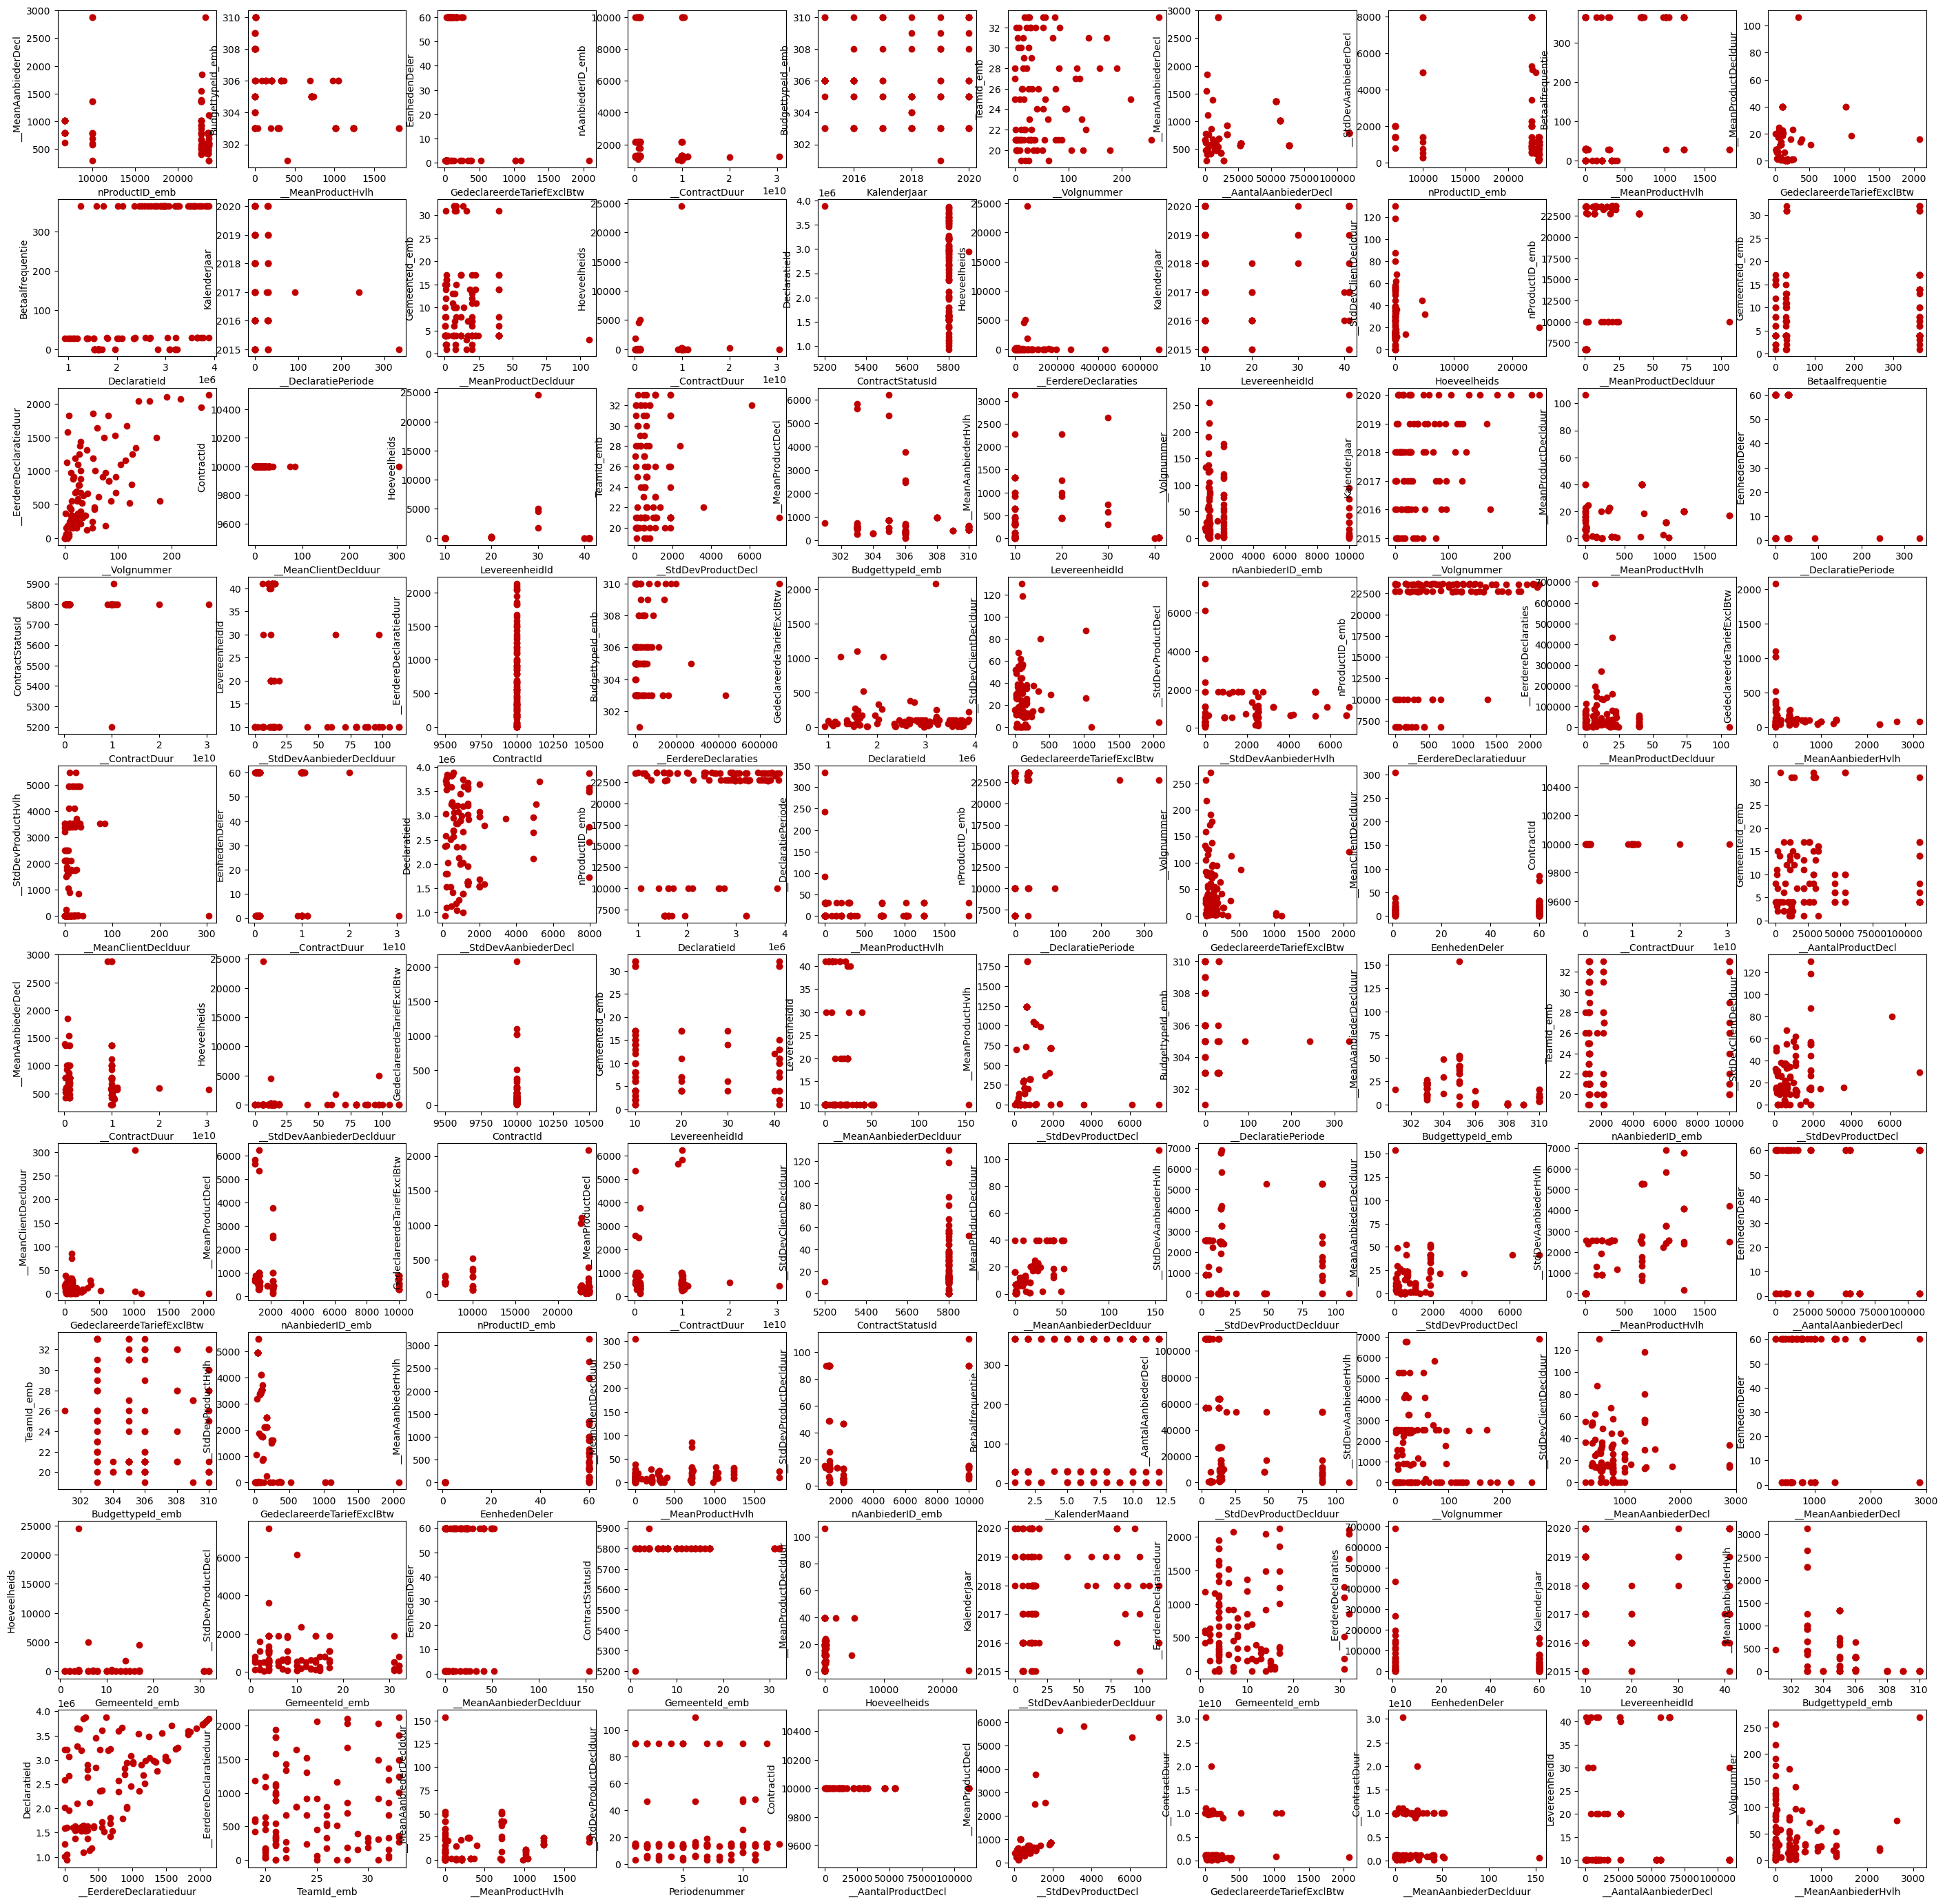

In [31]:
def get_pairs(df, n):
    n_feat = df.shape[1]-1
    from random import randint
    i = 0
    tuples = []
    while i <= n:
        x = df.columns[randint(0,n_feat)]
        y = df.columns[randint(0,n_feat)]
        while x == y and (x,y) in tuples or (y,x) in tuples:
            y = df.columns[randint(0,n_feat)]
        tuples.append((x,y))
        i+=1
    return tuples

df = x_train.head(100)
pairs = get_pairs(df, 100)

fig, axs = plt.subplots(10,10, figsize = (35,35))
i = 0
for rows in axs:
    for ax in rows:
        ax.scatter(df[pairs[i][0]],df[pairs[i][1]], color = "#C00000")
        ax.set_xlabel(pairs[i][0])
        ax.set_ylabel(pairs[i][1])
        i+=1

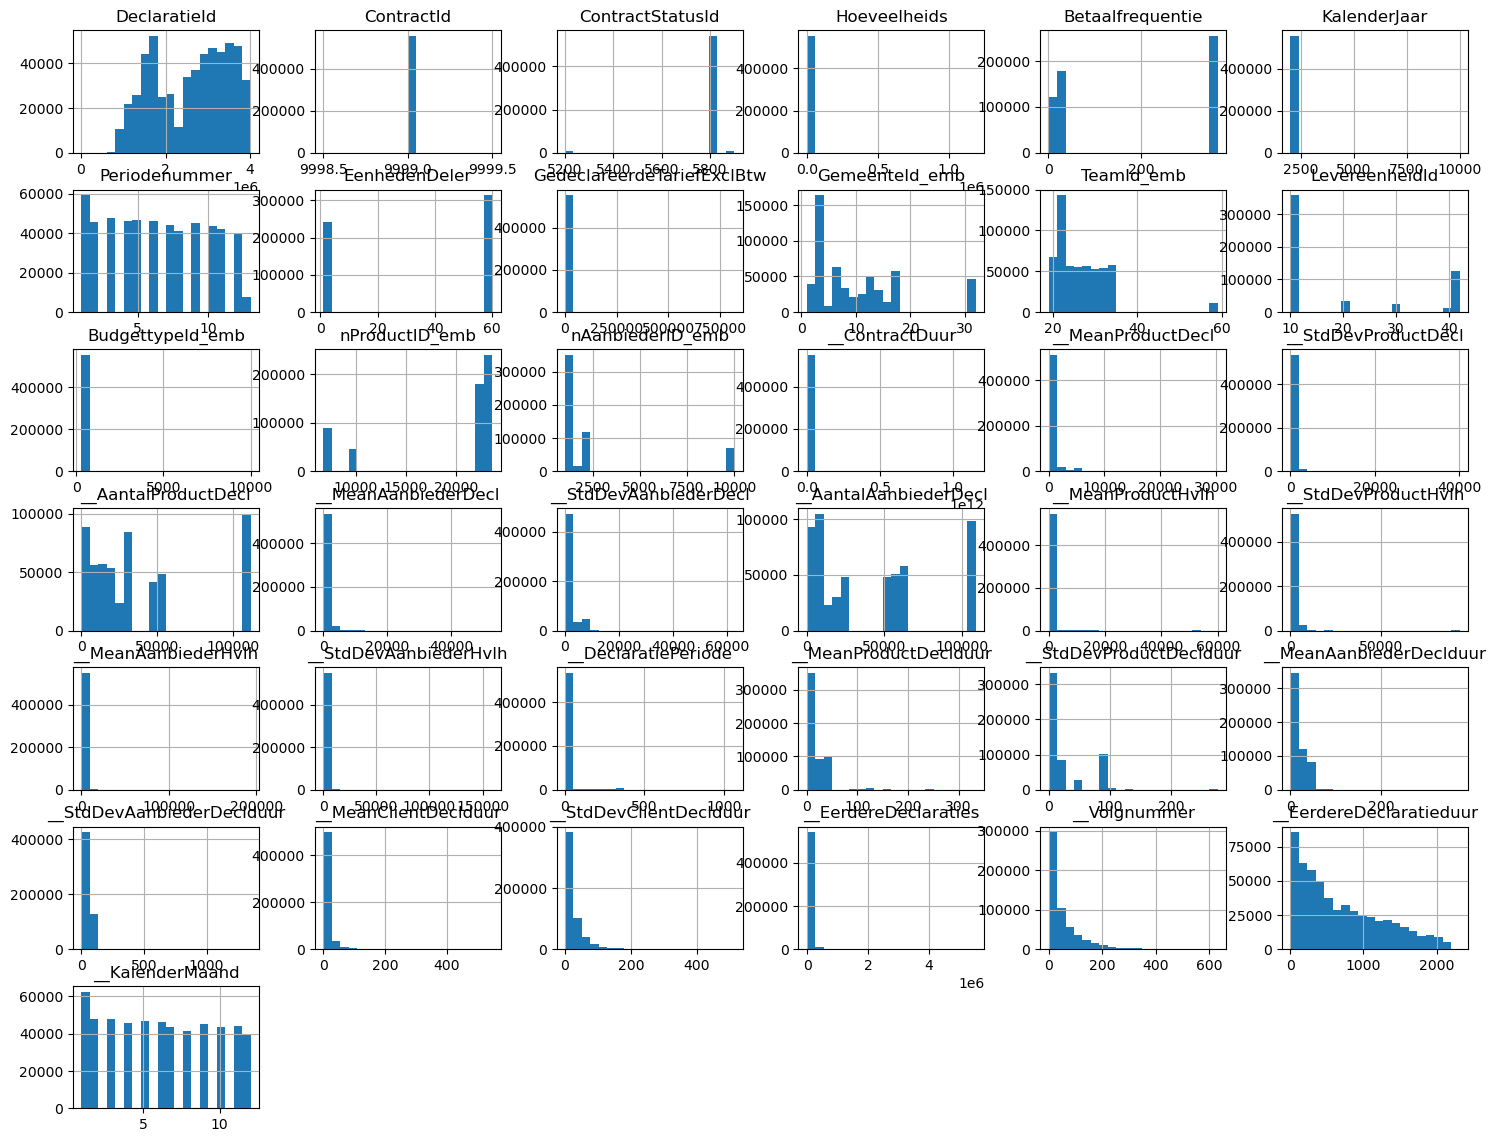

In [32]:
# Laat een histogram zien van alle numerieke waarden
x_train.hist(bins=20, figsize=(18,14))
plt.show()

In [33]:
# MAAK LOG()

C:\Users\kvdte\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\kvdte\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


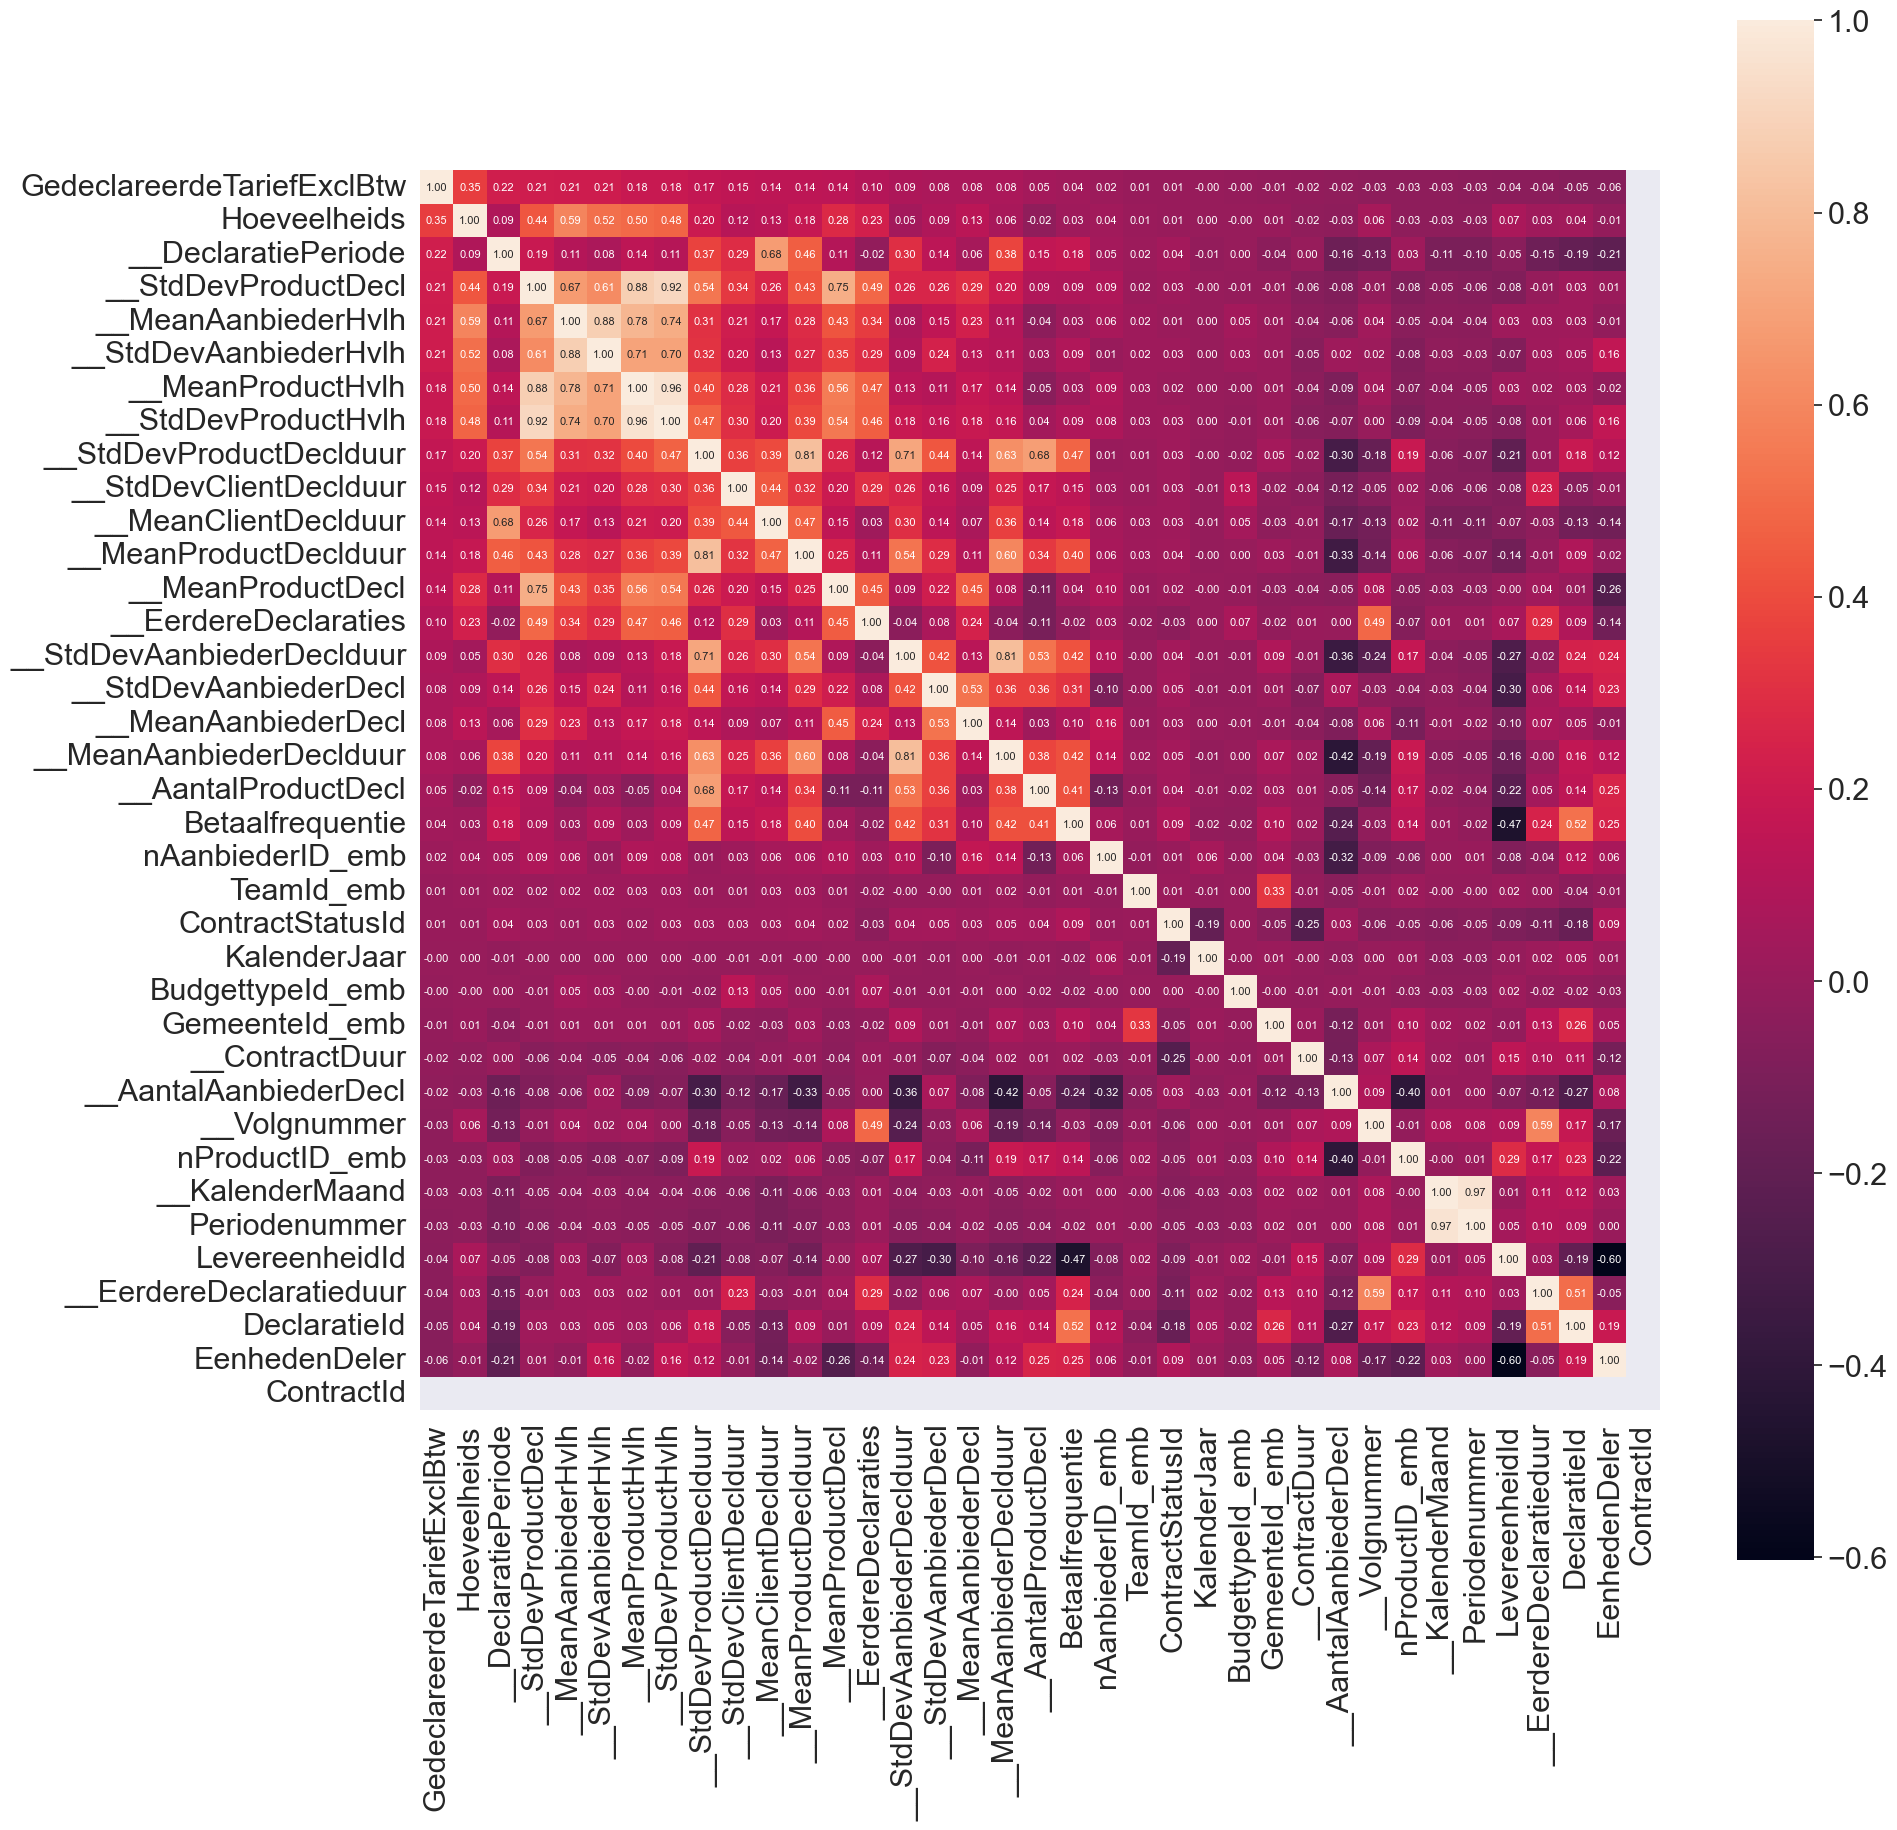

In [34]:
# Maak een heatmap mbv de correlatiefunctie
# Kolommen die sterk met elkaar gecorreleerd zijn mogen niet beide gebruikt worden in het ML-model
# Eén van de kolommen wordt dan weggegooid
# https://towardsdatascience.com/machine-learning-on-categorical-variables-3b76ffe4a7cb

import seaborn as sns

corrmat = x_train.corr(min_periods=1)
plt.figure(figsize=(20,20))

#number of variables for heatmap
k = np.shape(x_train)[0] 
cols = corrmat.nlargest(k, CorrelatieKenmerk)[CorrelatieKenmerk].index
cm = np.corrcoef(x_train[cols].values.T)

sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)

#plt.show()
plt.savefig('Correlatiematrix.png', dpi=600, bbox_inches='tight')

In [35]:
# FEATURE SELECTION
# Verwijder de kolommen waar de correlatie veel te groot is
# https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

tre = []
targetv = "Debet"
targetl = "Credit"
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.65:
            print(str(i) + ", " + str(j) + ": " + str(corrmat.columns.values[i]) + " " + str(corrmat.columns.values[j]) + " " + str(corrmat.iloc[i,j]))
            if corrmat.columns.values[j] not in tre:
                if corrmat.columns.values[j]!= targetv and corrmat.columns.values[j]!= targetl:
                    tre.append(corrmat.columns.values[j])

if DoNotDeleteColumns == False:
    print("\nDeze kolommen worden weggegooid: " + str(tre))
    x_train.drop(tre, axis=1, inplace=True)
    x_test.drop(tre, axis=1, inplace=True)
    aeset.drop(tre, axis=1, inplace=True)
    
    for var in tre:
        if var in Embedding: Embedding.remove(var)
        if var in Delete: Delete.remove(var)
        if var in OneHot: OneHot.remove(var)
        if var in Binary: Binary.remove(var)
        if var in SinEncoding: SinEncoding.remove(var)
        if var in LabelEncode: LabelEncode.remove(var)
        if var in Scaler: Scaler.remove(var)
    else:
        print("\nDeze kolommen worden NIET weggegooid: " + str(tre))


6, 36: Periodenummer __KalenderMaand 0.96789468081778
16, 17: __MeanProductDecl __StdDevProductDecl 0.7486507374297066
17, 22: __StdDevProductDecl __MeanProductHvlh 0.8768856583619125
17, 23: __StdDevProductDecl __StdDevProductHvlh 0.9167040934624832
17, 24: __StdDevProductDecl __MeanAanbiederHvlh 0.6721336121584945
18, 28: __AantalProductDecl __StdDevProductDeclduur 0.6811069591001255
22, 23: __MeanProductHvlh __StdDevProductHvlh 0.9590136594704958
22, 24: __MeanProductHvlh __MeanAanbiederHvlh 0.7775013534635391
22, 25: __MeanProductHvlh __StdDevAanbiederHvlh 0.705600671677044
23, 24: __StdDevProductHvlh __MeanAanbiederHvlh 0.7375510419169468
23, 25: __StdDevProductHvlh __StdDevAanbiederHvlh 0.7013988371452741
24, 25: __MeanAanbiederHvlh __StdDevAanbiederHvlh 0.8769845228030639
26, 31: __DeclaratiePeriode __MeanClientDeclduur 0.6750294710462694
27, 28: __MeanProductDeclduur __StdDevProductDeclduur 0.813787346731208
28, 30: __StdDevProductDeclduur __StdDevAanbiederDeclduur 0.7121783122

In [36]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and dev-sets
if DevSet > 0:
    x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size = DevSet, random_state = 42)
    print('\nDimensie van de devset, x_test:', x_dev.shape)
    print('Dimensie van de devset, y_test:', y_dev.shape)

print('Dimensie van de trainingset, x_train:', x_train.shape)
print('Dimensie van de trainingset, y_train:', y_train.shape)


Dimensie van de trainingset, x_train: (554280, 28)
Dimensie van de trainingset, y_train: (554280,)


In [37]:
nan_cols = [i for i in x_train.columns if x_train[i].isnull().any()]
print("Columns with NaN: " + str(nan_cols))

inf_cols = [i for i in x_train.columns if x_train[i].isin([np.inf, -np.inf]).all()]
print("Columns with Inf: " + str(inf_cols))

fl32_cols = [i for i in x_train.columns if x_train[i].dtype=='O']
print("Columns with object: " + str(fl32_cols))


Columns with NaN: []
Columns with Inf: []
Columns with object: []


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

if RandomForest == True:
    rf = RandomForestRegressor(n_estimators = 350, max_depth=15, min_samples_split=10, max_features=15, bootstrap=True, min_samples_leaf=1, random_state = 42)

    # Train the model on training data
    rf.fit(x_train, y_train);
    y_pred = rf.predict(x_test)

    print("\nResultaten Random Forest regression: ")
    print("MSE = " + str(metrics.mean_squared_error(y_test, y_pred)))
    # print("Cross value score: " + str(cross_val_score(rf, x_test, y_test, cv=5)))
    print('R2 Score:', round(metrics.r2_score(y_test, y_pred) * 100, 2), '%.')

    print("\nRandomForest regressor getrained met " + str(np.shape(x_train)[0]) + " records")
    print("RandomForest regressor getest met " + str(np.shape(x_test)[0]) + " records")


In [39]:
if RandomForest == True:
    # Get numerical feature importances
    importances = list(rf.feature_importances_)

    # List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns.values, importances)]

    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

    # Print out the feature and importances 
    print("\nBELANGRIJKE VARIABELEN")
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [40]:
import sklearn.metrics as metrics

if RandomForest == True:
    y_pred = pd.Series(rf.predict(x_test))

    print("Training results")
    print("R2 Score value 1 : " + str(metrics.r2_score(y_train, rf.predict(x_train))))
    print("MeanSqrE value 0 : " + str(metrics.mean_squared_error(y_train, rf.predict(x_train))))
    print("ExplVarE value 1 : " + str(metrics.explained_variance_score(y_train, rf.predict(x_train)))) #Best possible score is 1.0, lower values are worse.
    print("MeanAbsE value 0 : " + str(metrics.mean_absolute_error(y_train, rf.predict(x_train)))) # deze moet zo klein mogelijk zijn, richting 0

    print("\nTest results")
    print("R2 Score value 1 : " + str(metrics.r2_score(y_test, y_pred)))
    print("MeanSqrE value 0 : " + str(metrics.mean_squared_error(y_test, y_pred)))
    print("ExplVarE value 1 : " + str(metrics.explained_variance_score(y_test, y_pred))) #Best possible score is 1.0, lower values are worse.
    print("MeanAbsE value 0 : " + str(metrics.mean_absolute_error(y_test, y_pred))) # deze moet zo klein mogelijk zijn, richting 0


In [41]:
# Hyper parameter tuning met CV grid search
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score
from sklearn.metrics import mean_absolute_error, r2_score

if (HyperparameterTuning == True) and (DevSet > 0) and (RandomForest == True):
    # Number of trees in random forest
    n_estimators = [500, 1000, 1500]

    # Number of features to consider at every split
    NoFeatures = x_train.shape[1]
    max_features = [x for x in range(6, NoFeatures)]

    # Maximum number of levels in tree
    max_depth = [6, 10, 20]
    max_depth.append(None)

    # Minimum number of samples required to split a node
    min_samples_split = [5, 10, 15]

    # Minimum number of samples required at each leaf node
    min_samples_leaf = [5, 10, 15]

    # Method of selecting samples for training each tree
    # bootstrap = [True, False]

    # Create the random grid
    sgrid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}

    print("\nDit zijn de parameters waarmee getest gaan worden")
    print(sgrid)
    print("\n")

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune

    rf = RandomForestRegressor()
    #scorer = make_scorer(metrics.mean_squared_error, greater_is_better=False)
    scorer = make_scorer(metrics.r2_score, greater_is_better=True)
    sv_search = GridSearchCV(estimator=rf, param_grid=sgrid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs = -1)

    # Fit the random search model
    sv_search.fit(x_dev, y_dev)

    print("Dit zijn de beste parameters:")
    print(sv_search.best_params_)
    print("\n")


In [42]:
# de random forest nogmaals toe, maar nu door de training en test data 
# steeds te splitsen m.b.v. kFold (n=10)

from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import matplotlib.lines as lines

if (UseKFold == True) and (RandomForest == True):
    print("Eigenschappen van de feature data:")
    print(np.shape(x_train))

    print("\nEigenschappen van de target data:")
    print(np.shape(y_train))

    print("\nOptimalisatie beste Random Forest met kFold (6 cross validations)")
    RFscores = []
    RFscores.clear()
    cnt = 0

    # define 4-fold cross validation test sets
    kf = KFold(n_splits=10, shuffle=False, random_state=None)
    for train, test in kf.split(x_train, y_train):
        cnt = cnt + 1
        rf = RandomForestRegressor(n_estimators = 1000, max_depth=10, min_samples_split=2, max_features=5, bootstrap=True, min_samples_leaf=1, random_state = 42, verbose=True)
        rf.fit(x_train.iloc[train], y_train.iloc[train]);
        y_pred = rf.predict(x_train.iloc[test])
        Score = metrics.r2_score(y_train.iloc[test], y_pred) * 100
        print("R2 Score value 1 : " + str(Score))
        RFscores.append([cnt, Score])
    
    print(np.mean(RFscores))

    df = np.array(RFscores)
    df[:,0]

    fig = plt.figure()
    plt.plot(df[:,0], df[:,1], figure=fig)
    plt.show()

In [43]:
if (UseKFold == True) and (RandomForest == True):
    df = np.array(RFscores)
    print('KFold R2 Score:', round(df[:,1].mean()), '%.')
    

In [44]:
# Concatenate x en y om een dataset voor de Autoencoder te maken
x_train = pd.concat([x_train, y_train], axis=1)
x_test = pd.concat([x_test, y_test], axis=1)

#aeset.reset_index()
#x_train, x_test = train_test_split(aeset, test_size = Testset, random_state = 43)


In [45]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554280 entries, 305254 to 276292
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   DeclaratieId                554280 non-null  int64  
 1   ContractId                  554280 non-null  int32  
 2   ContractStatusId            554280 non-null  int32  
 3   Hoeveelheids                554280 non-null  int64  
 4   Betaalfrequentie            554280 non-null  int32  
 5   KalenderJaar                554280 non-null  int32  
 6   Periodenummer               554280 non-null  int64  
 7   EenhedenDeler               554280 non-null  int32  
 8   GedeclareerdeTariefExclBtw  554280 non-null  float64
 9   GemeenteId_emb              554280 non-null  int32  
 10  TeamId_emb                  554280 non-null  int32  
 11  LevereenheidId              554280 non-null  int32  
 12  BudgettypeId_emb            554280 non-null  int32  
 13  nProductI

In [46]:
# Dit blok zorgt voor encoding van de categorische variabelen
# String waarden worden dus omgezet naar een numerieke waarde. ML-modellen houden niet van strings
# Het omzetten wordt met een encoder gedaan

# https://stackoverflow.com/questions/66396499/value-error-y-contains-previously-unseen-labels
# https://towardsdatascience.com/avoid-data-leakage-split-your-data-before-processing-a7f172632b00

# OPLOSSINGEN VOOR DIT PROBLEEM:
# https://stackoverflow.com/questions/46288517/getting-valueerror-y-contains-new-labels-when-using-scikit-learns-labelencoder    
# https://stackoverflow.com/questions/21057621/sklearn-labelencoder-with-never-seen-before-values
    
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce


# OneHot + Binary + Embedding worden eerst gelabel-encode omdat ze dan een waarde van 0 tot n-1 (aantal categorische variabelen)
# De categorische variabelen in de list LabelEncode zijn hierboven al ge-encode
LabelsToEncode = OneHot + Binary + Embedding
if len(LabelsToEncode)>0:
    oenc = OrdinalEncoder()
    oenc.fit(x_train[LabelsToEncode])
    x_train[LabelsToEncode] = oenc.transform(x_train[LabelsToEncode])
    x_test[LabelsToEncode] = oenc.transform(x_test[LabelsToEncode])
    print(str(LabelsToEncode) + " is Label-encoded!")

encoders = dict()
lst = Scaler + SinEncoding
for col in lst:
    if col in Scaler:
        print(col + " wil be minmax-scaled")
        flmin = x_train[col].astype(float).min(axis=0)
        print("flmin " + str(flmin))
        flmax = x_train[col].astype(float).max(axis=0)
        print("flmax " + str(flmax))
        bereik = flmax-flmin
        if bereik > 0:
            x_train[col] = x_train[col].apply(lambda x: (float(x)-flmin) / bereik)
            x_test[col] = x_test[col].apply(lambda x: (float(x)-flmin) / bereik)
            str1 = col + " is minmax-scaled!"
            #ONDERSTAANDE WERKT NIET EN LEVERT NaN WAARDEN OP
            #encoders[col] = ColumnTransformer([(str(col)+'_Scaler', MinMaxScaler(), [col])], remainder='passthrough')
            #encoders[col].fit(x_train[[col]])
            #x_train[col] = pd.DataFrame(encoders[col].transform(x_train[[col]]))
            #x_test[col] = pd.DataFrame(encoders[col].transform(x_test[[col]]))
        else:
            x_train[col] = x_train[col].apply(lambda x: 0)
            x_test[col] = x_test[col].apply(lambda x: 0)
            str1 = col + " is minmax-scaled op 0-waarde!"
    elif col in SinEncoding:
        print(col + " wil be sinus-scaled")
        if ('Datum' in col):
            x_train[col] = x_train[col].apply(lambda x: np.sin(2 * np.pi * float(x)/365))
            x_test[col] = x_test[col].apply(lambda x: np.sin(2 * np.pi * float(x)/365))
        else:
            x_train[col] = x_train[col].apply(lambda x: np.sin(2 * np.pi * float(x)/13))
            x_test[col] = x_test[col].apply(lambda x: np.sin(2 * np.pi * float(x)/13))
        str1 = col + " is sinus-scaled!"
    print(str1 + "\n")

nan_cols = [i for i in x_train.columns if x_train[i].isnull().any()]
print("Columns with NaN: " + str(nan_cols))

# Deze training set is gelabel-encode, gescaled en sinus-encode
x_train.to_csv("data/IF_Declaraties_autoencoder_train.csv", decimal=",", sep=";")
x_test.to_csv("data/IF_Declaraties_autoencoder_test.csv", decimal=",", sep=";")


['KalenderJaar', 'EenhedenDeler', 'Betaalfrequentie', 'ContractId', 'ContractStatusId', 'LevereenheidId', 'nProductID_emb', 'nAanbiederID_emb', 'BudgettypeId_emb', 'GemeenteId_emb', 'TeamId_emb'] is Label-encoded!
Hoeveelheids wil be minmax-scaled
flmin -1.0
flmax 1191644.0
Hoeveelheids is minmax-scaled!

__MeanProductDeclduur wil be minmax-scaled
flmin 0.0
flmax 334.0
__MeanProductDeclduur is minmax-scaled!

__MeanAanbiederDeclduur wil be minmax-scaled
flmin 0.0
flmax 372.48979591836735
__MeanAanbiederDeclduur is minmax-scaled!

__StdDevClientDeclduur wil be minmax-scaled
flmin 0.0
flmax 512.5677922988602
__StdDevClientDeclduur is minmax-scaled!

__DeclaratiePeriode wil be minmax-scaled
flmin 0.0
flmax 1065.0
__DeclaratiePeriode is minmax-scaled!

__AantalProductDecl wil be minmax-scaled
flmin 1.0
flmax 111285.0
__AantalProductDecl is minmax-scaled!

__AantalAanbiederDecl wil be minmax-scaled
flmin 1.0
flmax 108943.0
__AantalAanbiederDecl is minmax-scaled!

__MeanProductDecl wil be mi

In [47]:
x_train.head(10)

,DeclaratieId,ContractId,ContractStatusId,Hoeveelheids,Betaalfrequentie,KalenderJaar,Periodenummer,EenhedenDeler,GedeclareerdeTariefExclBtw,GemeenteId_emb,TeamId_emb,LevereenheidId,BudgettypeId_emb,nProductID_emb,nAanbiederID_emb,__ContractDuur,__MeanProductDecl,__AantalProductDecl,__MeanAanbiederDecl,__StdDevAanbiederDecl,__AantalAanbiederDecl,__DeclaratiePeriode,__MeanProductDeclduur,__MeanAanbiederDeclduur,__StdDevClientDeclduur,__EerdereDeclaraties,__Volgnummer,__EerdereDeclaratieduur,GedeclareerdeKostenExclBtw
305254,2792293,0.0,1.0,0.000002,3.0,3.0,0.663123,1.0,0.000127,3.0,2.0,0.0,3.0,8.0,14.0,0.000431,0.028270,1.000000,0.016773,0.036508,0.153137,0.000000,0.118938,0.140182,0.086592,0.007564,0.019017,0.144339,0.038335
190386,2350117,0.0,1.0,0.000003,1.0,2.0,0.992709,0.0,0.000070,3.0,4.0,3.0,1.0,13.0,7.0,0.008534,0.015654,0.056037,0.010476,0.017927,0.247636,0.026291,0.067995,0.063664,0.026038,0.013984,0.198098,0.342697,0.038640
532373,3587963,0.0,1.0,0.000002,3.0,5.0,0.992709,1.0,0.000104,7.0,7.0,0.0,1.0,28.0,10.0,0.008707,0.017574,0.238165,0.008180,0.007955,0.077638,0.000000,0.035839,0.029341,0.027098,0.004980,0.041204,0.341400,0.038705
39576,1610490,0.0,1.0,0.000002,0.0,0.0,0.663123,1.0,0.000295,14.0,1.0,0.0,4.0,4.0,28.0,0.000948,0.004411,0.018278,0.014046,0.022222,1.000000,0.000000,0.001838,0.003659,0.018371,0.007431,0.064976,0.051858,0.038316
434966,3197825,0.0,1.0,0.000002,3.0,4.0,0.239316,1.0,0.000138,1.0,1.0,0.0,1.0,25.0,7.0,0.009138,0.016132,0.057385,0.010476,0.017927,0.247636,0.028169,0.060772,0.063664,0.026650,0.005357,0.055468,0.275713,0.038636
191357,2122783,0.0,1.0,0.000002,3.0,2.0,0.822984,0.0,0.001251,3.0,2.0,0.0,3.0,8.0,15.0,0.000690,0.028270,1.000000,0.008737,0.014472,0.068403,0.227230,0.118938,0.090140,0.171063,0.003247,0.001585,0.158168,0.039507
168372,1692898,0.0,1.0,0.000002,0.0,1.0,-0.822984,1.0,0.000213,5.0,5.0,0.0,4.0,0.0,20.0,0.008534,0.010735,0.414822,0.018215,0.031996,0.520479,0.000000,0.000852,0.000765,0.043180,0.013264,0.150555,0.289542,0.039634
270416,2681394,0.0,1.0,0.000002,2.0,3.0,0.822984,0.0,0.000469,2.0,8.0,0.0,6.0,26.0,29.0,0.000431,0.014238,0.114149,0.010145,0.009422,0.072626,0.000000,0.047491,0.000000,0.030012,0.013794,0.179081,0.500432,0.038755
96781,1640877,0.0,1.0,0.000002,0.0,0.0,-0.464723,0.0,0.000164,3.0,2.0,0.0,4.0,20.0,28.0,0.000948,0.124212,0.031802,0.014046,0.022222,1.000000,0.000000,0.018088,0.003659,0.017024,0.012424,0.058637,0.144339,0.043193
92381,1534052,0.0,1.0,0.000002,0.0,0.0,-0.822984,1.0,0.000213,3.0,2.0,0.0,4.0,0.0,20.0,0.000948,0.010735,0.414822,0.018215,0.031996,0.520479,0.000000,0.000852,0.000765,0.018180,0.005527,0.053883,0.131374,0.038317


In [48]:
lst = OneHot + Binary
for col in lst:
    if col in OneHot:
        print("OneHotENCODE \n")
        print(col + " wil be OneHot-encoded")
        encoders[col] = ce.OneHotEncoder(cols=col, handle_unknown='ignore')
        encoders[col].fit(x_train[col])
        ohe_x_train = encoders[col].transform(x_train[col])
        x_train.drop(col, axis=1, inplace=True)
        x_train = pd.concat([ohe_x_train, x_train], axis=1)
        ohe_x_test = encoders[col].transform(x_test[col])
        x_test.drop(col, axis=1, inplace=True)
        x_test = pd.concat([ohe_x_test, x_test], axis=1)
        str1 = col + " is OneHot-encoded!"
    elif col in Binary:
        print(col + " wil be Binary-encoded")
        encoders[col] = ce.BinaryEncoder(cols=[col])
        encoders[col].fit(x_train)
        x_train = pd.DataFrame(encoders[col].transform(x_train))
        x_test = pd.DataFrame(encoders[col].transform(x_test))
        str1 = col + " is Binary-encoded!"
    print(str1 + "\n")

nan_cols = [i for i in x_train.columns if x_train[i].isnull().any()]
print("Columns with NaN: " + str(nan_cols))

# Deze training set is gelabel-encode, gescaled en sinus-encode
# Deze set is ook geonehot-encode, binary encode
x_train.to_csv("data/EMB_Declaraties_autoencoder_train.csv", decimal=",", sep=";")
x_test.to_csv("data/EMB_Declaraties_autoencoder_test.csv", decimal=",", sep=";")

OneHotENCODE 

KalenderJaar wil be OneHot-encoded
KalenderJaar is OneHot-encoded!

OneHotENCODE 

EenhedenDeler wil be OneHot-encoded
EenhedenDeler is OneHot-encoded!

OneHotENCODE 

Betaalfrequentie wil be OneHot-encoded
Betaalfrequentie is OneHot-encoded!

OneHotENCODE 

ContractId wil be OneHot-encoded
ContractId is OneHot-encoded!

OneHotENCODE 

ContractStatusId wil be OneHot-encoded
ContractStatusId is OneHot-encoded!

OneHotENCODE 

LevereenheidId wil be OneHot-encoded
LevereenheidId is OneHot-encoded!

Columns with NaN: []


In [49]:
x_train.head(10)

,LevereenheidId_1,LevereenheidId_2,LevereenheidId_3,LevereenheidId_4,LevereenheidId_5,LevereenheidId_6,ContractStatusId_1,ContractStatusId_2,ContractStatusId_3,ContractId_1,Betaalfrequentie_1,Betaalfrequentie_2,Betaalfrequentie_3,Betaalfrequentie_4,EenhedenDeler_1,EenhedenDeler_2,KalenderJaar_1,KalenderJaar_2,KalenderJaar_3,KalenderJaar_4,KalenderJaar_5,KalenderJaar_6,KalenderJaar_7,DeclaratieId,Hoeveelheids,Periodenummer,GedeclareerdeTariefExclBtw,GemeenteId_emb,TeamId_emb,BudgettypeId_emb,nProductID_emb,nAanbiederID_emb,__ContractDuur,__MeanProductDecl,__AantalProductDecl,__MeanAanbiederDecl,__StdDevAanbiederDecl,__AantalAanbiederDecl,__DeclaratiePeriode,__MeanProductDeclduur,__MeanAanbiederDeclduur,__StdDevClientDeclduur,__EerdereDeclaraties,__Volgnummer,__EerdereDeclaratieduur,GedeclareerdeKostenExclBtw
305254,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,2792293,0.000002,0.663123,0.000127,3.0,2.0,3.0,8.0,14.0,0.000431,0.028270,1.000000,0.016773,0.036508,0.153137,0.000000,0.118938,0.140182,0.086592,0.007564,0.019017,0.144339,0.038335
190386,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,2350117,0.000003,0.992709,0.000070,3.0,4.0,1.0,13.0,7.0,0.008534,0.015654,0.056037,0.010476,0.017927,0.247636,0.026291,0.067995,0.063664,0.026038,0.013984,0.198098,0.342697,0.038640
532373,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,3587963,0.000002,0.992709,0.000104,7.0,7.0,1.0,28.0,10.0,0.008707,0.017574,0.238165,0.008180,0.007955,0.077638,0.000000,0.035839,0.029341,0.027098,0.004980,0.041204,0.341400,0.038705
39576,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1610490,0.000002,0.663123,0.000295,14.0,1.0,4.0,4.0,28.0,0.000948,0.004411,0.018278,0.014046,0.022222,1.000000,0.000000,0.001838,0.003659,0.018371,0.007431,0.064976,0.051858,0.038316
434966,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,3197825,0.000002,0.239316,0.000138,1.0,1.0,1.0,25.0,7.0,0.009138,0.016132,0.057385,0.010476,0.017927,0.247636,0.028169,0.060772,0.063664,0.026650,0.005357,0.055468,0.275713,0.038636
191357,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,2122783,0.000002,0.822984,0.001251,3.0,2.0,3.0,8.0,15.0,0.000690,0.028270,1.000000,0.008737,0.014472,0.068403,0.227230,0.118938,0.090140,0.171063,0.003247,0.001585,0.158168,0.039507
168372,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1692898,0.000002,-0.822984,0.000213,5.0,5.0,4.0,0.0,20.0,0.008534,0.010735,0.414822,0.018215,0.031996,0.520479,0.000000,0.000852,0.000765,0.043180,0.013264,0.150555,0.289542,0.039634
270416,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,2681394,0.000002,0.822984,0.000469,2.0,8.0,6.0,26.0,29.0,0.000431,0.014238,0.114149,0.010145,0.009422,0.072626,0.000000,0.047491,0.000000,0.030012,0.013794,0.179081,0.500432,0.038755
96781,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1640877,0.000002,-0.464723,0.000164,3.0,2.0,4.0,20.0,28.0,0.000948,0.124212,0.031802,0.014046,0.022222,1.000000,0.000000,0.018088,0.003659,0.017024,0.012424,0.058637,0.144339,0.043193
92381,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1534052,0.000002,-0.822984,0.000213,3.0,2.0,4.0,0.0,20.0,0.000948,0.010735,0.414822,0.018215,0.031996,0.520479,0.000000,0.000852,0.000765,0.018180,0.005527,0.053883,0.131374,0.038317


In [50]:
lst = Embedding
for col in lst:
    if col in Embedding:
        print("OneHotENCODE \n")
        print(col + " wil be OneHot-encoded")
        encoders[col] = ce.OneHotEncoder(cols=col, handle_unknown='ignore')
        encoders[col].fit(x_train[col])
        ohe_x_train = encoders[col].transform(x_train[col])
        x_train.drop(col, axis=1, inplace=True)
        x_train = pd.concat([ohe_x_train, x_train], axis=1)
        ohe_x_test = encoders[col].transform(x_test[col])
        x_test.drop(col, axis=1, inplace=True)
        x_test = pd.concat([ohe_x_test, x_test], axis=1)
        str1 = col + " is OneHot-encoded!"
    print(str1 + "\n")

nan_cols = [i for i in x_train.columns if x_train[i].isnull().any()]
print("Columns with NaN: " + str(nan_cols))

# Deze training set is gelabel-encode, gescaled en sinus-encode
# Deze set is ook geonehot-encode, binary encode
x_train.to_csv("data/NN_Declaraties_autoencoder_train.csv", decimal=",", sep=";")
x_test.to_csv("data/NN_Declaraties_autoencoder_test.csv", decimal=",", sep=";")

OneHotENCODE 

nProductID_emb wil be OneHot-encoded
nProductID_emb is OneHot-encoded!

OneHotENCODE 

nAanbiederID_emb wil be OneHot-encoded
nAanbiederID_emb is OneHot-encoded!

OneHotENCODE 

BudgettypeId_emb wil be OneHot-encoded
BudgettypeId_emb is OneHot-encoded!

OneHotENCODE 

GemeenteId_emb wil be OneHot-encoded
GemeenteId_emb is OneHot-encoded!

OneHotENCODE 

TeamId_emb wil be OneHot-encoded
TeamId_emb is OneHot-encoded!

Columns with NaN: []


In [51]:
x_train.head(10)

,TeamId_emb_1,TeamId_emb_2,TeamId_emb_3,TeamId_emb_4,TeamId_emb_5,TeamId_emb_6,TeamId_emb_7,TeamId_emb_8,TeamId_emb_9,TeamId_emb_10,TeamId_emb_11,TeamId_emb_12,TeamId_emb_13,TeamId_emb_14,TeamId_emb_15,TeamId_emb_16,GemeenteId_emb_1,GemeenteId_emb_2,GemeenteId_emb_3,GemeenteId_emb_4,GemeenteId_emb_5,GemeenteId_emb_6,GemeenteId_emb_7,GemeenteId_emb_8,GemeenteId_emb_9,GemeenteId_emb_10,GemeenteId_emb_11,GemeenteId_emb_12,GemeenteId_emb_13,GemeenteId_emb_14,GemeenteId_emb_15,GemeenteId_emb_16,GemeenteId_emb_17,GemeenteId_emb_18,GemeenteId_emb_19,BudgettypeId_emb_1,BudgettypeId_emb_2,BudgettypeId_emb_3,BudgettypeId_emb_4,BudgettypeId_emb_5,BudgettypeId_emb_6,BudgettypeId_emb_7,BudgettypeId_emb_8,BudgettypeId_emb_9,nAanbiederID_emb_1,nAanbiederID_emb_2,nAanbiederID_emb_3,nAanbiederID_emb_4,nAanbiederID_emb_5,nAanbiederID_emb_6,nAanbiederID_emb_7,nAanbiederID_emb_8,nAanbiederID_emb_9,nAanbiederID_emb_10,nAanbiederID_emb_11,nAanbiederID_emb_12,nAanbiederID_emb_13,nAanbiederID_emb_14,nAanbiederID_emb_15,nAanbiederID_emb_16,nAanbiederID_emb_17,nAanbiederID_emb_18,nAanbiederID_emb_19,nAanbiederID_emb_20,nAanbiederID_emb_21,nAanbiederID_emb_22,nAanbiederID_emb_23,nAanbiederID_emb_24,nAanbiederID_emb_25,nAanbiederID_emb_26,nAanbiederID_emb_27,nAanbiederID_emb_28,nAanbiederID_emb_29,nAanbiederID_emb_30,nAanbiederID_emb_31,nAanbiederID_emb_32,nProductID_emb_1,nProductID_emb_2,nProductID_emb_3,nProductID_emb_4,nProductID_emb_5,nProductID_emb_6,nProductID_emb_7,nProductID_emb_8,nProductID_emb_9,nProductID_emb_10,nProductID_emb_11,nProductID_emb_12,nProductID_emb_13,nProductID_emb_14,nProductID_emb_15,nProductID_emb_16,nProductID_emb_17,nProductID_emb_18,nProductID_emb_19,nProductID_emb_20,nProductID_emb_21,nProductID_emb_22,nProductID_emb_23,nProductID_emb_24,nProductID_emb_25,nProductID_emb_26,nProductID_emb_27,nProductID_emb_28,nProductID_emb_29,nProductID_emb_30,nProductID_emb_31,nProductID_emb_32,nProductID_emb_33,nProductID_emb_34,nProductID_emb_35,nProductID_emb_36,LevereenheidId_1,LevereenheidId_2,LevereenheidId_3,LevereenheidId_4,LevereenheidId_5,LevereenheidId_6,ContractStatusId_1,ContractStatusId_2,ContractStatusId_3,ContractId_1,Betaalfrequentie_1,Betaalfrequentie_2,Betaalfrequentie_3,Betaalfrequentie_4,EenhedenDeler_1,EenhedenDeler_2,KalenderJaar_1,KalenderJaar_2,KalenderJaar_3,KalenderJaar_4,KalenderJaar_5,KalenderJaar_6,KalenderJaar_7,DeclaratieId,Hoeveelheids,Periodenummer,GedeclareerdeTariefExclBtw,__ContractDuur,__MeanProductDecl,__AantalProductDecl,__MeanAanbiederDecl,__StdDevAanbiederDecl,__AantalAanbiederDecl,__DeclaratiePeriode,__MeanProductDeclduur,__MeanAanbiederDeclduur,__StdDevClientDeclduur,__EerdereDeclaraties,__Volgnummer,__EerdereDeclaratieduur,GedeclareerdeKostenExclBtw
305254,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,2792293,0.000002,0.663123,0.000127,0.000431,0.028270,1.000000,0.016773,0.036508,0.153137,0.000000,0.118938,0.140182,0.086592,0.007564,0.019017,0.144339,0.038335
190386,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,2350117,0.000003,0.992709,0.000070,0.008534,0.015654,0.056037,0.010476,0.017927,0.247636,0.026291,0.067995,0.063664,0.026038,0.013984,0.198098,0.342697,0.038640
532373,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,3587963,0.000002,0.992709,0.000104,0.008707,0.017574,0.238165,0.008180,0.007955,0.077638,0.000000,0.035839,0.02934

## 